# Importando os dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [2]:
%matplotlib inline

In [3]:
dados = pd.read_csv('DBcomparativa_from_json.csv')

In [4]:
dados

,SMILES_exp,SMILES_teorico,lambda_exp,lambda_unit,extinction,extinction_unit,solvent,lambda_sTDA,f_sTDA,gap_HL,molWt
0,C[Si]1(C)c2cc(ccc2c2c1cc(cc2)c1ccc(cc1)N(c1ccc...,C[Si]1(C)c2cc(ccc2c2c1cc(cc2)c1ccc(cc1)N(c1ccc...,371,nm,NaN,NaN,NaN,326.0,2.094090e+00,7.3040,696.97
1,Sc1[nH]nc(n1)N=Nc1c(c2ccccc2)n(c2c1cccc2)C,Sc1[nH]nc(n1)N=Nc1c(c2ccccc2)n(c2c1cccc2)C,394,NaN,NaN,NaN,DMSO,434.5,3.531655e-03,7.5156,334.41
2,CCCCCCCCCCCCOc1cc2nc(C=Cc3ccc(cc3)c3cc(nc(c3)c...,COc1cc2nc(C=Cc3ccc(cc3)c3cc(nc(c3)c3ccccn3)c3c...,503,nm,NaN,NaN,NaN,355.1,1.376181e+00,6.8510,655.76
3,N#CC(=CN1C(Cl)CCc2c1cccc2)C(=O)O,N#CC(=CN1C(Cl)CCc2c1cccc2)C(=O)O,450,NaN,NaN,NaN,NaN,269.8,6.929888e-01,8.5706,262.70
4,Cc1cc(c(s1)C)C1=C(CC(=Cc2ccc(cc2)N(C)C)C1=O)c1...,Cc1cc(c(s1)C)C1=C(CC(=Cc2ccc(cc2)N(C)C)C1=O)c1...,411,nm,4,NaN,NaN,325.6,2.501992e-02,7.3413,433.64
...,...,...,...,...,...,...,...,...,...,...,...
6137,[O-][N+](=O)c1ccc2c(c1)c1ccccc1[nH]2,[O-][N+](=O)c1ccc2c(c1)c1ccccc1[nH]2,336,NaN,NaN,NaN,NaN,313.0,5.020000e-07,8.3115,212.21
6138,C1=CCc2c(C1)cc1c(c2C=Nc2ccc3c(c2)cccc3)cccc1,C1=CCc2c(C1)cc1c(c2C=Nc2ccc3c(c2)cccc3)cccc1,405,nm,17770,l mol − 1 cm − 1,NaN,323.0,5.779404e-01,7.7012,333.43
6139,CCCCN1c2ccc(cc2Oc2c1cccc2)C=C(C(=O)O)C#N,CN1c2ccc(cc2Oc2c1cccc2)C=C(C(=O)O)C#N,464,nm,NaN,NaN,NaN,363.3,5.437133e-01,6.8095,292.29
6140,c1ccc(cc1)C=Cc1nc(c(n1Cc1ccccc1)c1ccco1)c1ccco1,c1ccc(cc1)C=Cc1nc(c(n1Cc1ccccc1)c1ccco1)c1ccco1,345,nm,NaN,NaN,NaN,314.6,1.296807e+00,7.3731,392.46


# Informações gerais dos dados

In [27]:
# tipos de dados
dados.dtypes

SMILES_exp          object
SMILES_teorico      object
lambda_exp           int64
lambda_unit         object
extinction          object
extinction_unit     object
solvent             object
lambda_sTDA        float64
f_sTDA             float64
gap_HL             float64
molWt              float64
dtype: object

In [28]:
# verificando a quantidade de dados faltantes
dados.isnull().sum()

SMILES_exp            0
SMILES_teorico        0
lambda_exp            0
lambda_unit        1276
extinction         5010
extinction_unit    5363
solvent            4306
lambda_sTDA           0
f_sTDA                0
gap_HL                0
molWt                 0
dtype: int64

In [29]:
# quantidade de compostos únicos no dataframe
dados['SMILES_teorico'].nunique()

6070

In [30]:
# quantidade de compostos únicos no dataframe
dados['SMILES_exp'].nunique()

5625

In [31]:
dados_smi = dados['SMILES_teorico'] == dados['SMILES_exp']

In [32]:
dados_smi.value_counts()

True     4764
False    1378
dtype: int64

# Corrigindo dados

In [5]:
dados['solvent'] = dados['solvent'].str.lower()

In [6]:
dados['solvent'].unique()

array([nan, 'dmso', 'ethanol', 'ch 2 cl', 'chloroform', 'acetone', 'dcm',
       'chlorobenzene', 'dichloromethane', 'cyclohexane', 'hexane',
       'etoh', 'ch 2 cl 2', 'acetonitrile', 'tetrahydrofuran', 'thf',
       'cl', 'methanol', 'tfa', 'benzyl alcohol', 'chcl3', 'toluene',
       'dioxane', 'bcn', 'dmf', 'kbr', 'etoac', 'pyridine', 'mecn',
       'benzene', 'ch2cl2 ( c 2 × 10–5 mol / l )', 'quartz', 'c6h12',
       'ch3cn', 'ch 3 cn', 'acn', 'nmp', 'barium sulfate', 'water',
       'meoh', 'butanol', 'ch 2 cl 2 + 0.2 mmol l − 1 bu 4 nbf',
       'heptane', 'ethylacetate', 'silica', 'dimethylsufoxide', 'ch2cl2',
       'c6h6', 'dimethylsulfoxide', 'dimethylformamide', 'mops',
       '1,4-dioxane', 'mch', 'pgmea', 'phcn', 'n-hexane', 'cch',
       'dimethyl sulfoxide', 'propylene carbonate', 'hcl', 'hex', 'mthf',
       'tbaf', 'chcl', 'sds', 'dibutyl ether', 'methylene chloride',
       'ethyl acetate', 'n'], dtype=object)

In [7]:
solventes = {'ch 2 cl': 'dichloromethane', 'etoh': 'ethanol', 'ch 2 cl 2': 'dichloromethane', 'tetrahydrofuran': 'thf', 
             'chcl3': 'chloroform', 'ch2cl2 ( c 2 × 10–5 mol / l )': 'dichloromethane', 'c6h12': 'cyclohexane', 
            'ch3cn': 'acetonitrile', 'ch 3 cn': 'acetonitrile', 'acn': 'acetonitrile', 'meoh': 'methanol', 
             'dimethylsufoxide': 'dmso', 'ch2cl2': 'dichloromethane', 'c6h6': 'benzene', 'dimethylsulfoxide': 'dmso', 
            'dimethylformamide': 'dmf', 'dimethyl sulfoxide': 'dmso', '1,4-dioxane': 'dioxane', 
             'methylene chloride': 'dichloromethane', 'ethyl acetate': 'ethylacetate', 'etoac': 'ethylacetate', 
            'n-hexane': 'hexane', 'mecn': 'acetonitrile', 'ch 2 cl 2 + 0.2 mmol l − 1 bu 4 nbf': 'dichlromethane'}
dados['solvent'] = dados['solvent'].replace(solventes)

In [8]:
dados['solvent'].unique()

array([nan, 'dmso', 'ethanol', 'dichloromethane', 'chloroform', 'acetone',
       'dcm', 'chlorobenzene', 'cyclohexane', 'hexane', 'acetonitrile',
       'thf', 'cl', 'methanol', 'tfa', 'benzyl alcohol', 'toluene',
       'dioxane', 'bcn', 'dmf', 'kbr', 'ethylacetate', 'pyridine',
       'benzene', 'quartz', 'nmp', 'barium sulfate', 'water', 'butanol',
       'dichlromethane', 'heptane', 'silica', 'mops', 'mch', 'pgmea',
       'phcn', 'cch', 'propylene carbonate', 'hcl', 'hex', 'mthf', 'tbaf',
       'chcl', 'sds', 'dibutyl ether', 'n'], dtype=object)

In [37]:
dados

,SMILES_exp,SMILES_teorico,lambda_exp,lambda_unit,extinction,extinction_unit,solvent,lambda_sTDA,f_sTDA,gap_HL,molWt
0,C[Si]1(C)c2cc(ccc2c2c1cc(cc2)c1ccc(cc1)N(c1ccc...,C[Si]1(C)c2cc(ccc2c2c1cc(cc2)c1ccc(cc1)N(c1ccc...,371,nm,NaN,NaN,NaN,326.0,2.094090e+00,7.3040,696.97
1,Sc1[nH]nc(n1)N=Nc1c(c2ccccc2)n(c2c1cccc2)C,Sc1[nH]nc(n1)N=Nc1c(c2ccccc2)n(c2c1cccc2)C,394,NaN,NaN,NaN,dmso,434.5,3.531655e-03,7.5156,334.41
2,CCCCCCCCCCCCOc1cc2nc(C=Cc3ccc(cc3)c3cc(nc(c3)c...,COc1cc2nc(C=Cc3ccc(cc3)c3cc(nc(c3)c3ccccn3)c3c...,503,nm,NaN,NaN,NaN,355.1,1.376181e+00,6.8510,655.76
3,N#CC(=CN1C(Cl)CCc2c1cccc2)C(=O)O,N#CC(=CN1C(Cl)CCc2c1cccc2)C(=O)O,450,NaN,NaN,NaN,NaN,269.8,6.929888e-01,8.5706,262.70
4,Cc1cc(c(s1)C)C1=C(CC(=Cc2ccc(cc2)N(C)C)C1=O)c1...,Cc1cc(c(s1)C)C1=C(CC(=Cc2ccc(cc2)N(C)C)C1=O)c1...,411,nm,4,NaN,NaN,325.6,2.501992e-02,7.3413,433.64
...,...,...,...,...,...,...,...,...,...,...,...
6137,[O-][N+](=O)c1ccc2c(c1)c1ccccc1[nH]2,[O-][N+](=O)c1ccc2c(c1)c1ccccc1[nH]2,336,NaN,NaN,NaN,NaN,313.0,5.020000e-07,8.3115,212.21
6138,C1=CCc2c(C1)cc1c(c2C=Nc2ccc3c(c2)cccc3)cccc1,C1=CCc2c(C1)cc1c(c2C=Nc2ccc3c(c2)cccc3)cccc1,405,nm,17770,l mol − 1 cm − 1,NaN,323.0,5.779404e-01,7.7012,333.43
6139,CCCCN1c2ccc(cc2Oc2c1cccc2)C=C(C(=O)O)C#N,CN1c2ccc(cc2Oc2c1cccc2)C=C(C(=O)O)C#N,464,nm,NaN,NaN,NaN,363.3,5.437133e-01,6.8095,292.29
6140,c1ccc(cc1)C=Cc1nc(c(n1Cc1ccccc1)c1ccco1)c1ccco1,c1ccc(cc1)C=Cc1nc(c(n1Cc1ccccc1)c1ccco1)c1ccco1,345,nm,NaN,NaN,NaN,314.6,1.296807e+00,7.3731,392.46


In [38]:
dados.dtypes

SMILES_exp          object
SMILES_teorico      object
lambda_exp           int64
lambda_unit         object
extinction          object
extinction_unit     object
solvent             object
lambda_sTDA        float64
f_sTDA             float64
gap_HL             float64
molWt              float64
dtype: object

In [39]:
dados['extinction'] = pd.to_numeric(dados['extinction'], errors='coerce', downcast='integer')

# Limpando os dados

In [9]:
dados['lambda_unit'].unique()

array(['nm', nan, 'cm−1'], dtype=object)

In [10]:
dados.query("lambda_unit == 'cm−1'")

,SMILES_exp,SMILES_teorico,lambda_exp,lambda_unit,extinction,extinction_unit,solvent,lambda_sTDA,f_sTDA,gap_HL,molWt
518,Nc1ccc(cc1)N,Nc1ccc(cc1)N,321,cm−1,NaN,× 10 − 3 M − 1 cm − 1,NaN,285.0,0.067824,8.9646,108.14
519,Nc1ccc(cc1)N,ONc1ncnc2c1[nH]cn2,321,cm−1,NaN,× 10 − 3 M − 1 cm − 1,NaN,244.3,0.050953,9.6976,151.13
587,CN(c1ccc(cc1)N(C)C)C,CN(c1ccc(cc1)N(C)C)C,332,cm−1,NaN,× 10 − 3 M − 1 cm − 1,NaN,289.3,0.082349,8.8038,164.25
781,OC[C@H]1O[C@H]([C@@H]([C@@H]1O)O)n1cnc2c1ccnc2N,OC[C@H]1O[C@H]([C@@H]([C@@H]1O)O)n1cnc2c1ccnc2N,8600,cm−1,358,NaN,NaN,254.9,0.193607,9.3460,266.26
1954,Cc1cccnc1,Cc1cccnc1,2009,cm−1,NaN,NaN,cl,251.3,0.009783,10.5336,93.13
2025,CCCC[n+]1c(C=C2C(=C(C2=O)c2c(O)cc(cc2O)N2c3ccc...,C[n+]1c(C=C2C(=C(C2=O)c2c(O)cc(cc2O)N2c3ccccc3...,668,cm−1,1.91,10 5 M − 1 cm − 1,NaN,483.5,2.206434,5.5237,480.55
3251,Oc1ccccc1CNCc1ccccc1OCCCOc1ccccc1CNCc1ccccc1O,Oc1ccccc1CNCc1ccccc1OCCCOc1ccccc1CNCc1ccccc1O,277,cm−1,7380,M − 1 cm − 1,dmf,247.0,0.064787,9.4410,498.62
3426,OCc1ccc(o1)c1nn(c2c1cccc2)Cc1ccccc1,OCc1ccc(o1)c1nn(c2c1cccc2)Cc1ccccc1,344,cm−1,15.9,NaN,NaN,293.2,0.513976,8.2350,304.35
3740,CC(=O)C=NNc1ccccc1,CC(=O)C=NNc1ccccc1,340,cm−1,NaN,NaN,NaN,305.2,0.000086,8.3093,162.19
4210,CCCC[N+]1=C(C=C2C(=C(C2=O)c2c(O)cc(cc2O)N2c3cc...,C[N+]1=C(C=C2C(=C(C2=O)c2c(O)cc(cc2O)N2c3ccccc...,667,cm−1,2.41,10 5 M − 1 cm − 1,NaN,475.4,2.175524,5.6192,490.56


In [11]:
dados = dados.query("lambda_unit != 'cm−1'")

In [12]:
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(13, 6)})

In [13]:
dados.describe()

,lambda_exp,extinction,lambda_sTDA,f_sTDA,gap_HL,molWt
count,6127.000000,1123.000000,6127.000000,6127.000000,6127.000000,6127.000000
mean,469.280398,11096.136298,326.631826,0.446393,7.945089,362.564248
std,638.230320,19343.132054,71.344401,0.595763,1.125955,132.457271
min,100.000000,0.050000,194.400000,0.000000,4.116900,92.140000
25%,316.000000,4.245000,282.250000,0.016246,7.144950,262.915000
50%,381.000000,18.900000,315.100000,0.179495,7.851000,353.430000
75%,464.000000,16900.000000,357.200000,0.642781,8.695400,446.415000
max,9800.000000,151760.000000,1826.000000,3.693697,11.534500,776.870000


[Text(0.5, 0, 'coeficiente de extinção molar'), Text(0, 0.5, 'quantidade')]

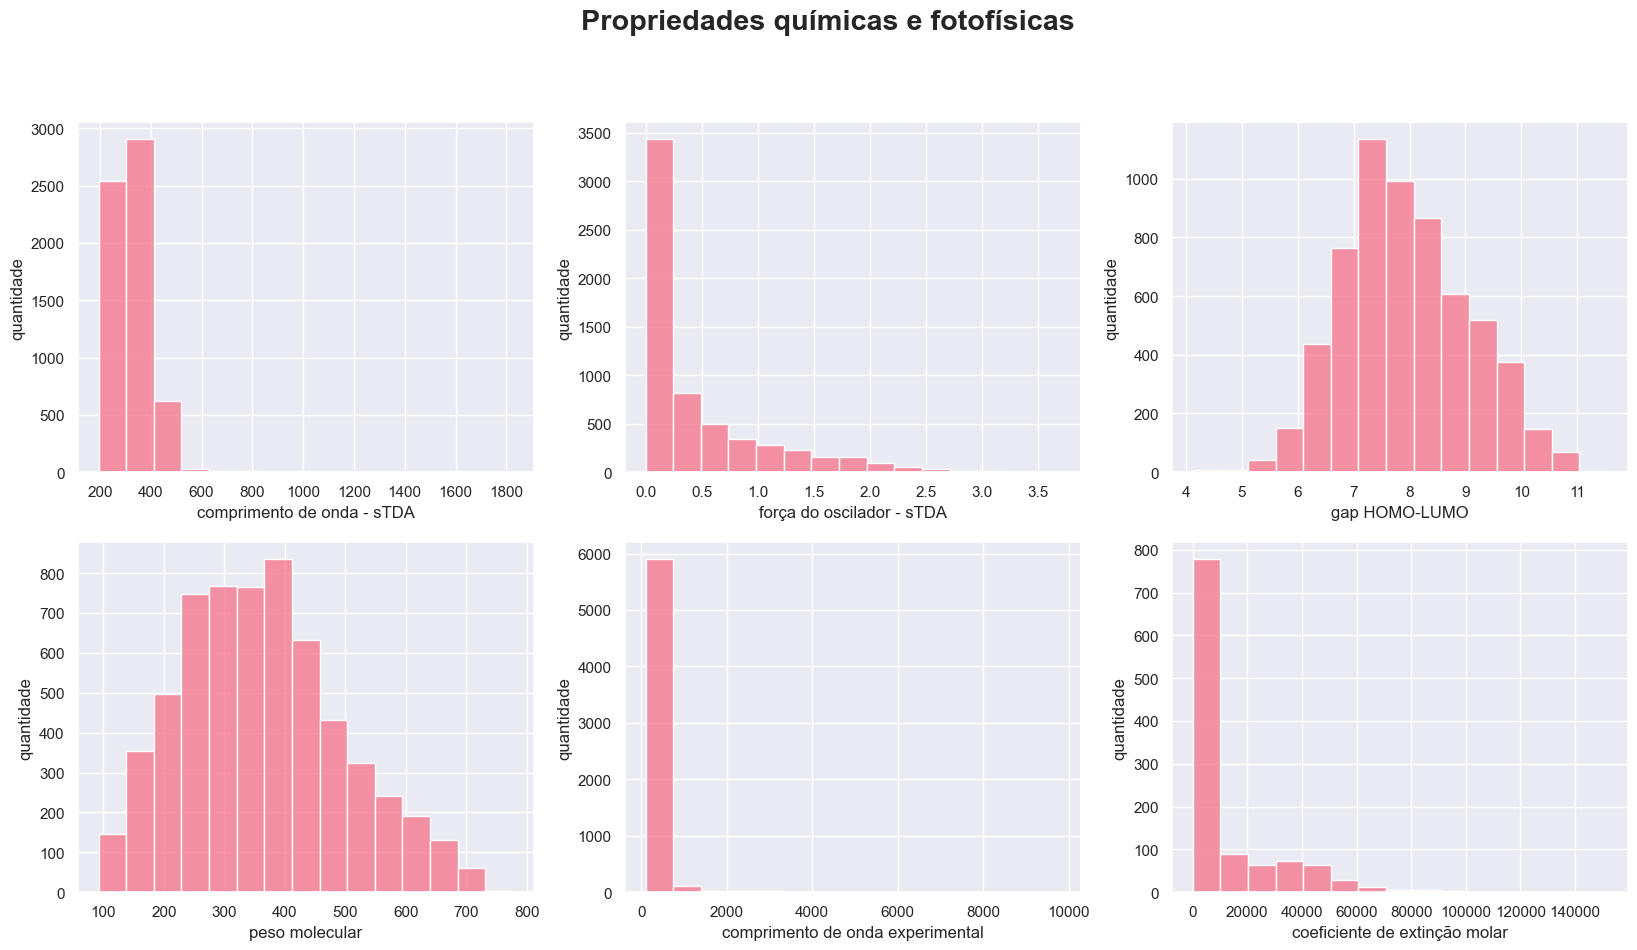

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle(
    'Propriedades químicas e fotofísicas',
    verticalalignment='center',
    fontsize='xx-large',
    weight='bold')

# Plot 1:
ax1 = sns.histplot(data=dados, x='lambda_sTDA', ax=ax[0,0], bins=15)
ax1.set(xlabel="comprimento de onda - sTDA", ylabel="quantidade")

# Plot 2:
ax2 = sns.histplot(data=dados, x='f_sTDA', ax=ax[0,1], bins=15)
ax2.set(xlabel="força do oscilador - sTDA", ylabel="quantidade")

# Plot 3:
ax3 = sns.histplot(data=dados, x='gap_HL', ax=ax[0,2], bins=15)
ax3.set(xlabel="gap HOMO-LUMO", ylabel="quantidade")

# Plot 4:
ax4 = sns.histplot(data=dados, x='molWt', ax=ax[1,0], bins=15)
ax4.set(xlabel="peso molecular", ylabel="quantidade")

# Plot 5:
ax5 = sns.histplot(data=dados, x='lambda_exp', ax=ax[1,1], bins=15)
ax5.set(xlabel="comprimento de onda experimental", ylabel="quantidade")

# Plot 6:
ax6 = sns.histplot(data=dados, x='extinction', ax=ax[1,2], bins=15)
ax6.set(xlabel="coeficiente de extinção molar", ylabel="quantidade")


<Axes: xlabel='gap_HL'>

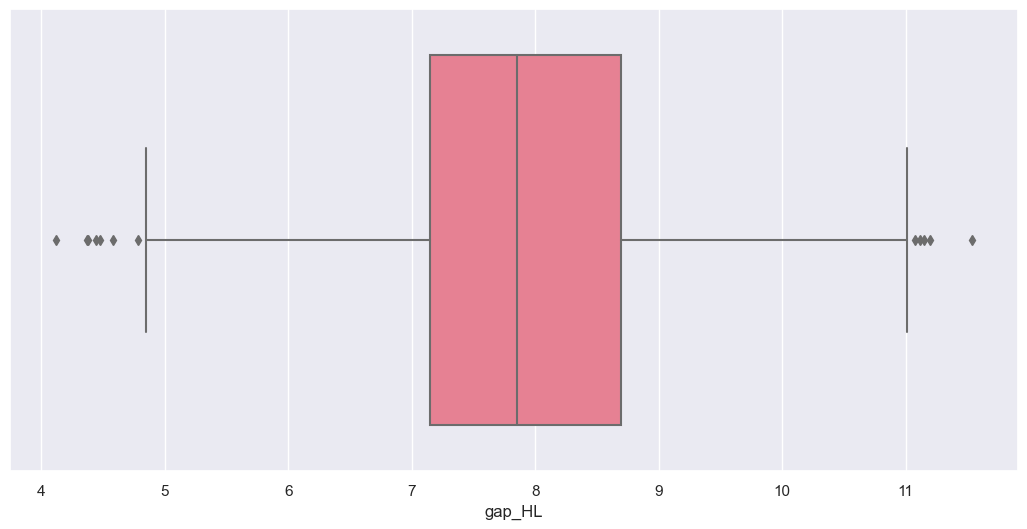

In [221]:
sns.boxplot(x='gap_HL', data=dados)

In [13]:
gap_nm = []

for eV in dados['gap_HL']:
    Joule = eV * (1.60218 * (10 ** (-19)))
    m = ((6.62607015 * (10 ** (-34))) * (299792458))/Joule
    nm = m * 10 ** (9)
    nm = round(nm, 2)
    gap_nm.append(nm)
    
dados['gap_HL'] = gap_nm

C:\Users\ganna\AppData\Local\Temp\ipykernel_10800\3903488839.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['gap_HL'] = gap_nm


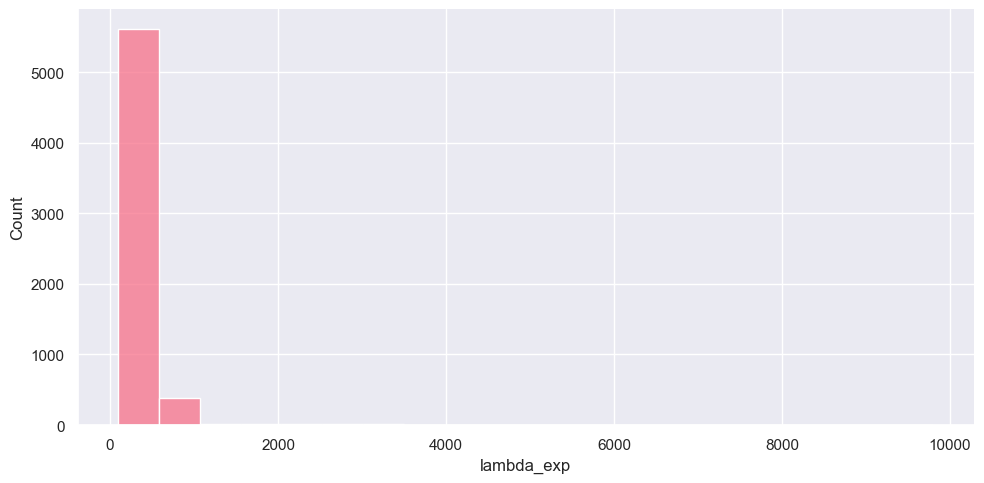

In [223]:
sns.displot(dados, x='lambda_exp', bins=20, height=5, aspect=2)

<Axes: xlabel='lambda_exp'>

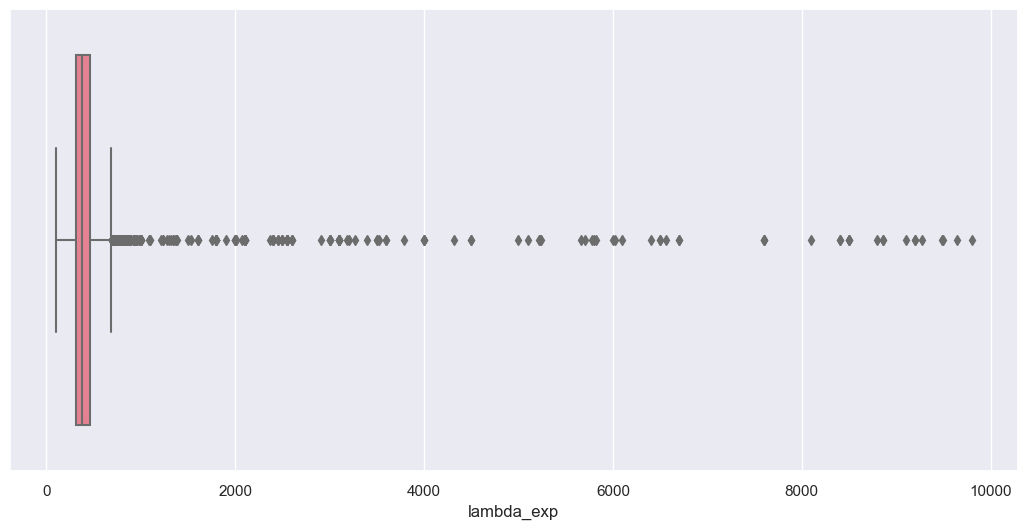

In [224]:
sns.boxplot(x='lambda_exp', data=dados)

In [225]:
boxplot_stats(dados['lambda_exp'])

[{'mean': 469.2803982373103,
  'iqr': 148.0,
  'cilo': 378.03149744105417,
  'cihi': 383.96850255894583,
  'whishi': 685,
  'whislo': 100,
  'fliers': array([8500, 8500,  900,  930,  931,  900, 5100, 1082,  703, 6700, 6700,
         2100,  760, 9647, 3101, 2550,  930,  730, 1800,  806,  942,  740,
         1000,  930,  720,  741, 2500, 8100,  850, 7600, 2550, 1797, 1797,
          803,  780,  791, 3497, 2600,  810,  744, 6500, 1378,  931,  715,
         2500, 2500, 1348, 1901, 8400, 1998,  773,  873, 9486, 2550, 2550,
          848,  848, 6566, 3600, 9100,  820,  943, 6400, 6000, 1214,  830,
          700,  822, 2101, 2101, 1240,  930, 9200,  957,  826, 3000, 3000,
          930, 1240,  860,  860, 5000, 3101,  705,  730,  730, 5220, 1536,
         1273,  941, 1383, 2100,  738, 4500,  933,  814, 6500, 1320,  700,
         1370,  839,  868,  868,  713,  850,  701,  890, 8858, 8858, 1752,
          983, 3600,  735,  875,  710,  790, 2401,  779,  779,  773,  700,
         8500, 3269, 2550,

In [226]:
min([y for stat in boxplot_stats(dados['lambda_exp']) for y in stat['fliers']])

691

In [227]:
max([y for stat in boxplot_stats(dados['lambda_exp']) for y in stat['fliers']])

9800

In [228]:
# parâmetros estatísticos de cada variável
stats = dados.describe()
stats

,lambda_exp,lambda_sTDA,f_sTDA,gap_HL,molWt
count,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000
mean,469.280398,326.631826,0.446393,159.244415,362.564248
std,638.230320,71.344401,0.595763,22.958834,132.457271
min,100.000000,194.400000,0.000000,107.490000,92.140000
25%,316.000000,282.250000,0.016246,142.590000,262.915000
50%,381.000000,315.100000,0.179495,157.920000,353.430000
75%,464.000000,357.200000,0.642781,173.530000,446.415000
max,9800.000000,1826.000000,3.693697,301.160000,776.870000


# Investigando lambda_exp

Max peak: 9800.0
Min peak: 100.0


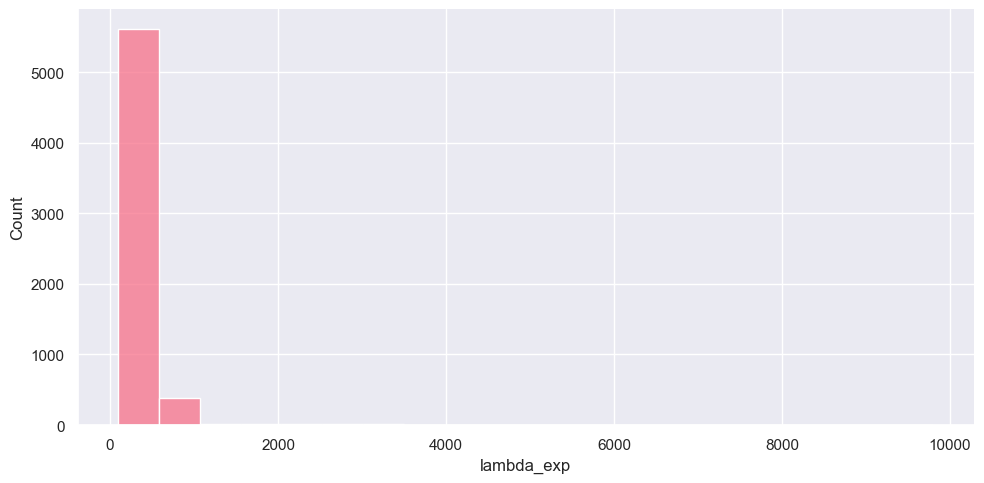

In [229]:
# distribuição dos lambdas obtidos experimentalmente
print('Max peak:', stats.iloc[-1,0])
print('Min peak:', stats.iloc[3,0])
sns.displot(dados, x='lambda_exp', bins=20, height=5, aspect=2)

<Axes: xlabel='lambda_exp'>

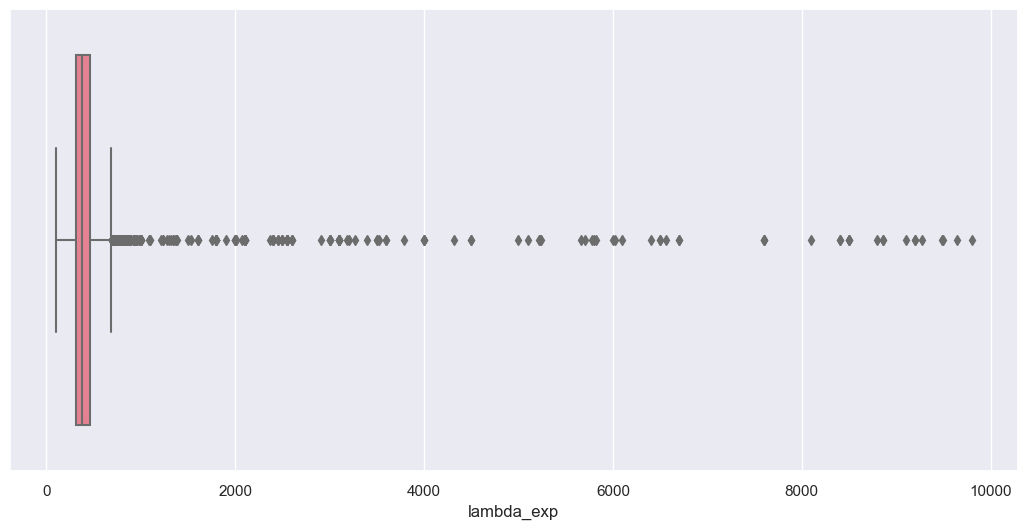

In [230]:
sns.boxplot(x='lambda_exp', data=dados)

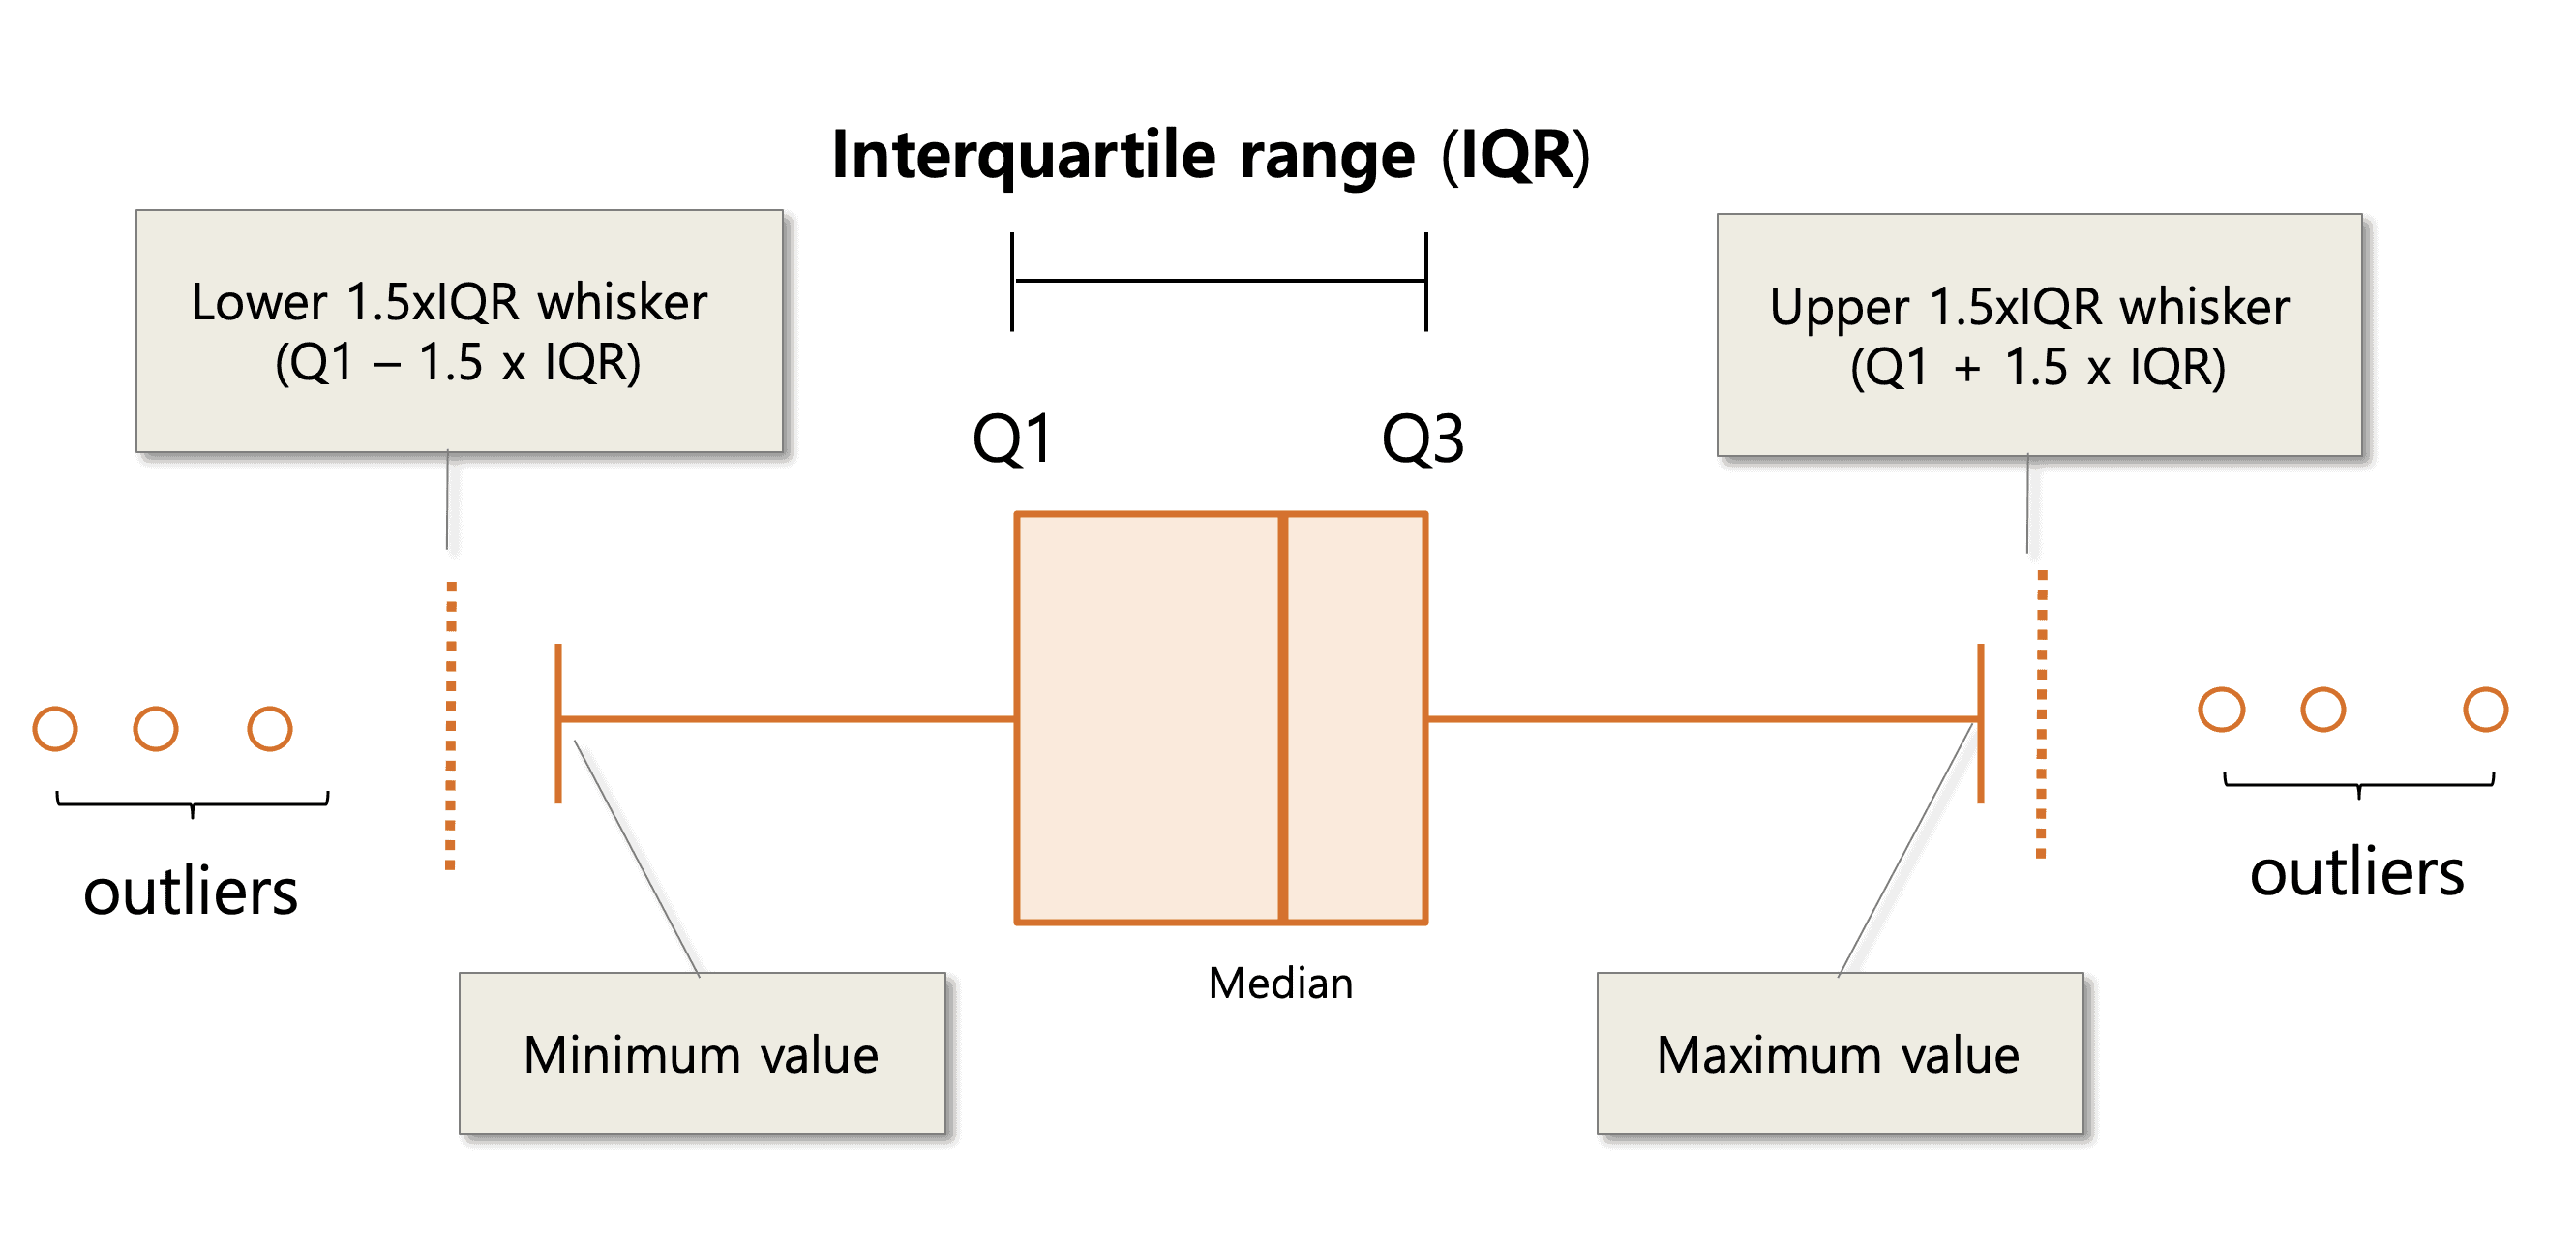

In [231]:
boxplot_stats(dados['lambda_exp'])

[{'mean': 469.2803982373103,
  'iqr': 148.0,
  'cilo': 378.03149744105417,
  'cihi': 383.96850255894583,
  'whishi': 685,
  'whislo': 100,
  'fliers': array([8500, 8500,  900,  930,  931,  900, 5100, 1082,  703, 6700, 6700,
         2100,  760, 9647, 3101, 2550,  930,  730, 1800,  806,  942,  740,
         1000,  930,  720,  741, 2500, 8100,  850, 7600, 2550, 1797, 1797,
          803,  780,  791, 3497, 2600,  810,  744, 6500, 1378,  931,  715,
         2500, 2500, 1348, 1901, 8400, 1998,  773,  873, 9486, 2550, 2550,
          848,  848, 6566, 3600, 9100,  820,  943, 6400, 6000, 1214,  830,
          700,  822, 2101, 2101, 1240,  930, 9200,  957,  826, 3000, 3000,
          930, 1240,  860,  860, 5000, 3101,  705,  730,  730, 5220, 1536,
         1273,  941, 1383, 2100,  738, 4500,  933,  814, 6500, 1320,  700,
         1370,  839,  868,  868,  713,  850,  701,  890, 8858, 8858, 1752,
          983, 3600,  735,  875,  710,  790, 2401,  779,  779,  773,  700,
         8500, 3269, 2550,

# Investigando lambda_sTDA

Max peak: 1826.0
Min peak: 194.4


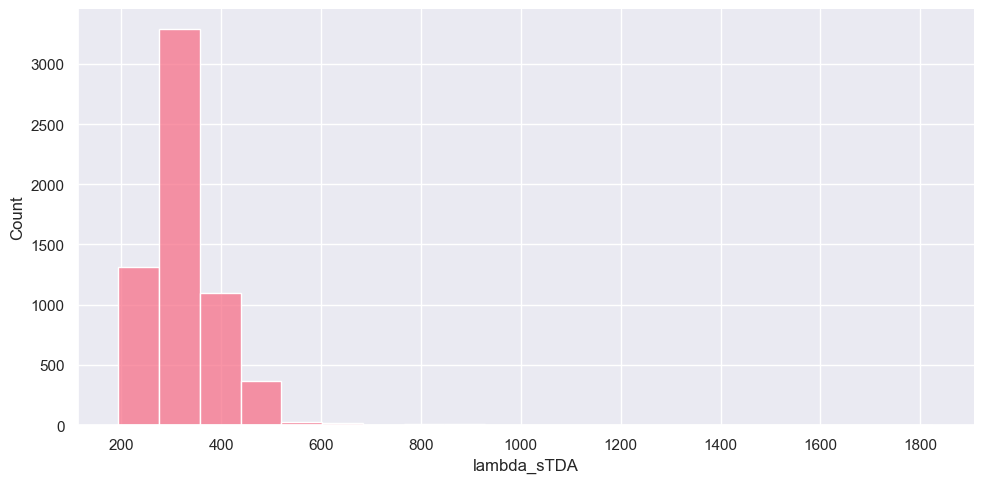

In [232]:
# distribuição dos lambdas obtidos por sTDA 
print('Max peak:', stats.iloc[-1,1])
print('Min peak:', stats.iloc[3,1])
sns.displot(dados, x='lambda_sTDA', bins=20, height=5, aspect=2)

<Axes: xlabel='lambda_sTDA'>

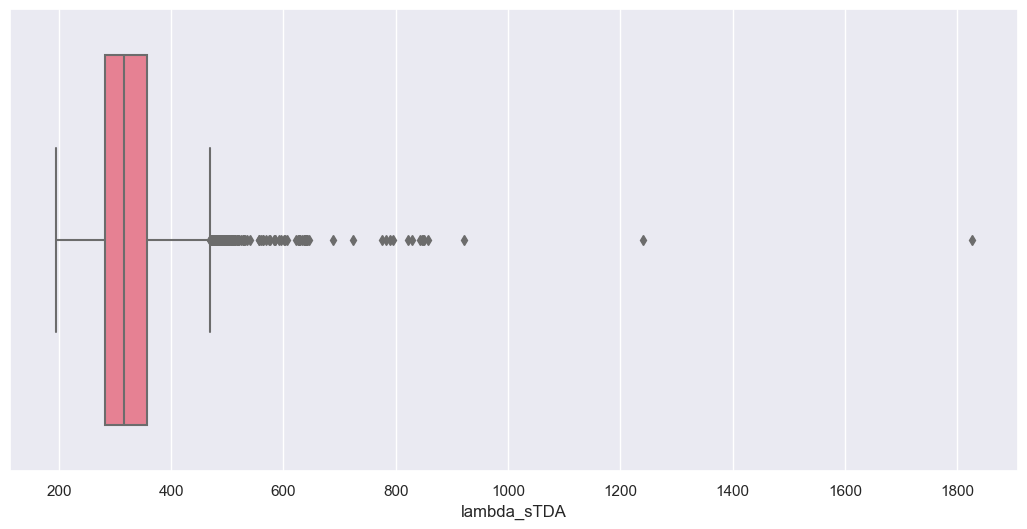

In [233]:
sns.boxplot(x='lambda_sTDA', data=dados)

In [234]:
boxplot_stats(dados['lambda_sTDA'])

[{'mean': 326.6318263424188,
  'iqr': 74.94999999999999,
  'cilo': 313.5966941432906,
  'cihi': 316.6033058567094,
  'whishi': 469.6,
  'whislo': 194.4,
  'fliers': array([ 471.5,  498.3,  476.6,  843.4,  478.1,  479.3,  491.1,  483.4,
          474.3,  472.3,  473. ,  480.1,  472.1,  510.2,  473.7,  478.7,
          473.9,  513.5,  491. ,  487.4,  500.1,  471.2,  474. ,  473.9,
          507.8,  594.9,  477.4,  495.3,  471. ,  490.3,  474.7,  645. ,
          582.8,  485.5,  636. ,  506.6,  828.9,  517.3,  790.4,  625.3,
          627.7,  484.2,  627.4,  540.4,  556.2,  476.6,  471.1,  622.6,
          490.7,  477.6,  496.9,  470.2,  528.7,  528.9,  473.4,  491.2,
          500.3,  851. ,  492.6,  641.5,  512.7,  633.2,  821.7,  517.6,
          498.9,  508.4,  493.2,  473.2,  532.1,  922.3,  494.5,  605.5,
          559.6,  491.4,  510. ,  471. ,  508.9,  640. ,  518.8,  479.6,
          474.4,  628. ,  491.7,  469.7,  486.4,  471.1,  497.1,  490.3,
          847.1,  485.1, 1826. ,  

# Correlação entre os lambdas

In [15]:
from scipy import stats

Slope of the regression line: 0.0056558052902242655
Intercept of the regression line: 323.97766778346966
Coefficient of determination: 0.002559905731227302


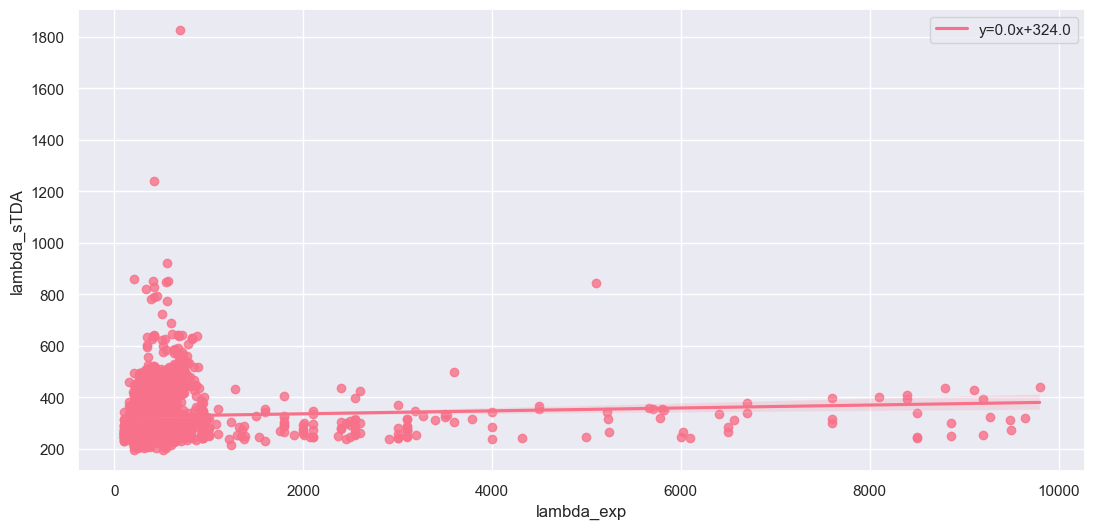

In [44]:
# obtendo regressão linear para (lambda_exp, lambda_sTDA)
slope, intercept, r_value, p_value, std_err = stats.linregress(dados['lambda_exp'],dados['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['lambda_exp'],dados['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

# Distribuição do erros dos lambdas

C:\Users\ganna\AppData\Local\Temp\ipykernel_19032\3609746075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['delta_E'] = dados['lambda_sTDA'] - dados['lambda_exp']


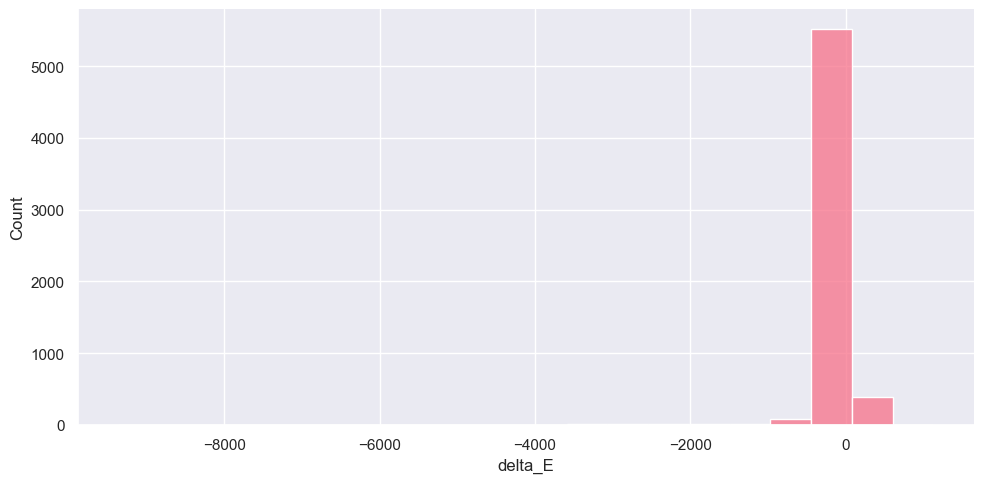

In [45]:
# distribuição do erro dos lambdas
dados['delta_E'] = dados['lambda_sTDA'] - dados['lambda_exp']
sns.displot(dados, x='delta_E', bins=20, height=5, aspect=2)

[Text(0.5, 0, 'erro absoluto (ΔE)')]

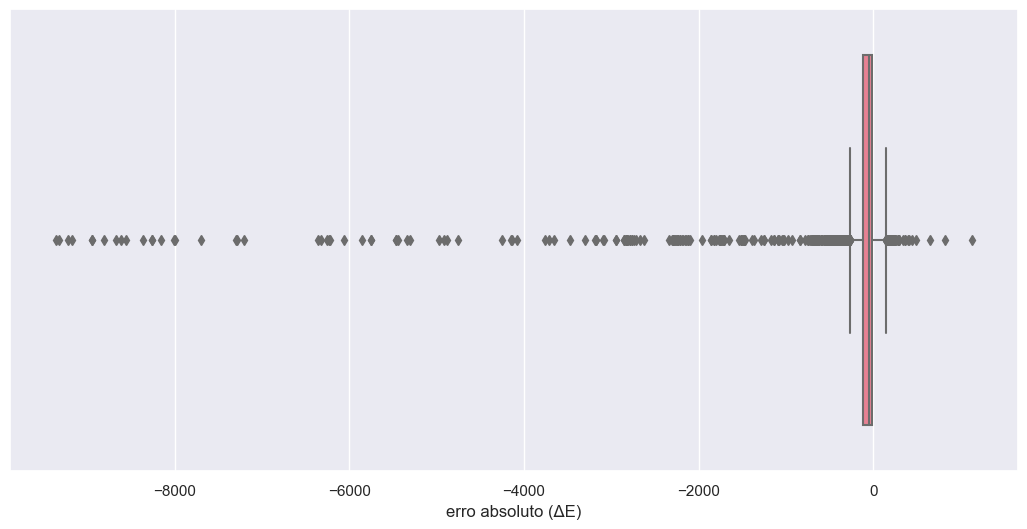

In [46]:
sns.boxplot(dados, x='delta_E'). set(xlabel='erro absoluto (ΔE)')

## Correlação entre os lambdas em função dos solventes

In [237]:
# obtendo a frequência dos solventes
solv_freq = dados['solvent'].value_counts()
solv_freq

dichloromethane        360
dmso                   283
chloroform             162
methanol               136
ethanol                119
thf                    114
dmf                    102
acetonitrile            98
toluene                 91
dcm                     53
acetone                 49
ethylacetate            41
cyclohexane             35
dioxane                 27
hexane                  23
water                   20
tfa                     19
benzene                 13
cl                      12
nmp                     10
pyridine                 8
quartz                   6
chlorobenzene            6
barium sulfate           5
bcn                      4
heptane                  4
pgmea                    4
kbr                      3
benzyl alcohol           3
phcn                     3
propylene carbonate      2
dichlromethane           2
silica                   2
butanol                  2
dibutyl ether            1
mthf                     1
sds                      1
c

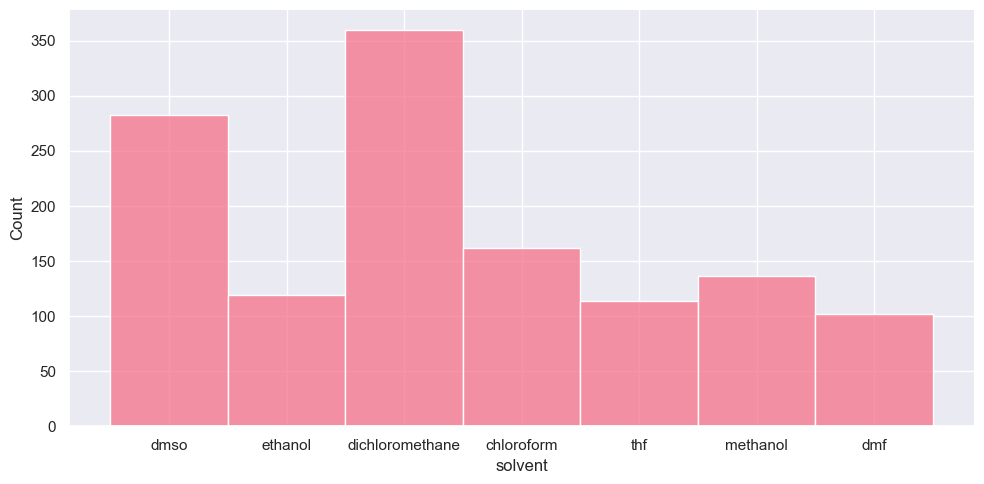

In [238]:
# distribuição dos principais solventes
top_solv = dados[dados['solvent'].isin(solv_freq[solv_freq > 100].index)]
sns.displot(top_solv, x='solvent', bins=20, height=5, aspect=2)

Slope of the regression line: 0.031670128077329836
Intercept of the regression line: 332.8365186316165
Coefficient of determination: 0.017068593004281214


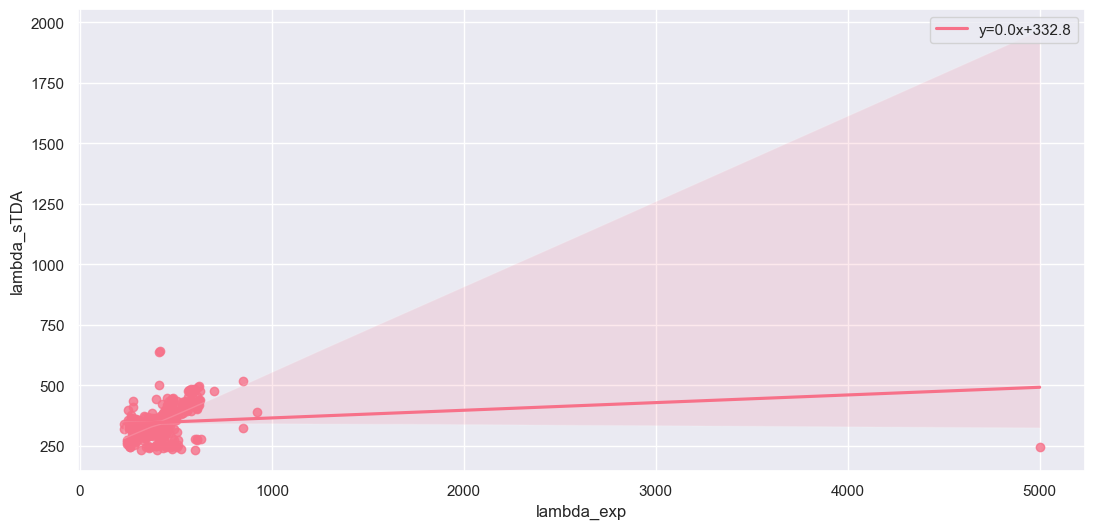

In [239]:
# regressão linear para (lambda_exp em dichloromethane, lambda_sTDA)

dados_dichlo = dados.query("solvent == 'dichloromethane'")

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dichlo['lambda_exp'],dados_dichlo['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_dichlo, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dichlo['lambda_exp'],dados_dichlo['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.32517978028182026
Intercept of the regression line: 225.96278041809916
Coefficient of determination: 0.12310204034258942


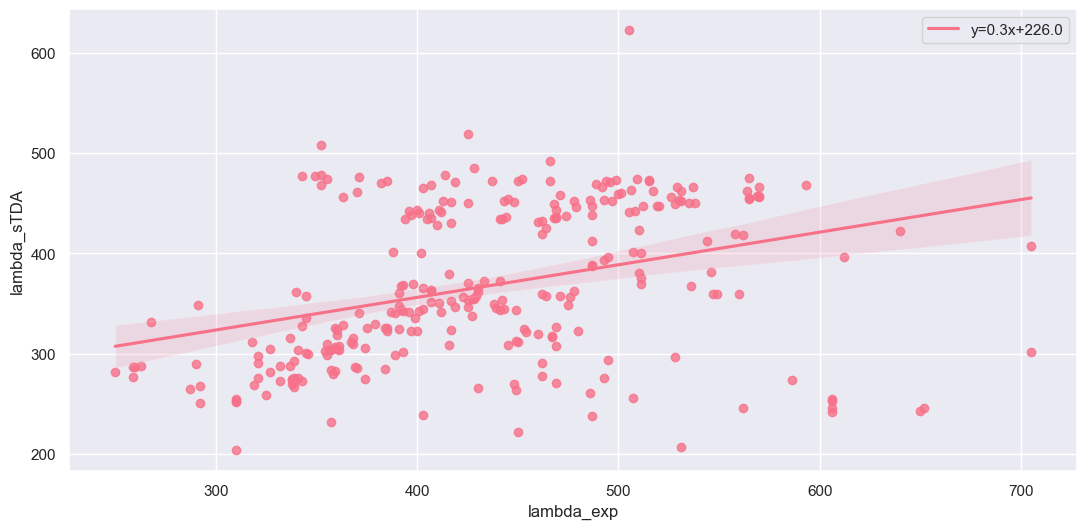

In [240]:
# regressão linear para (lambda_exp em DMSO, lambda_sTDA)

dados_dmso = dados.query("solvent == 'dmso'")

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dmso['lambda_exp'],dados_dmso['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_dmso, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dmso['lambda_exp'],dados_dmso['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.28283313008234695
Intercept of the regression line: 215.11194454942085
Coefficient of determination: 0.2580553719124665


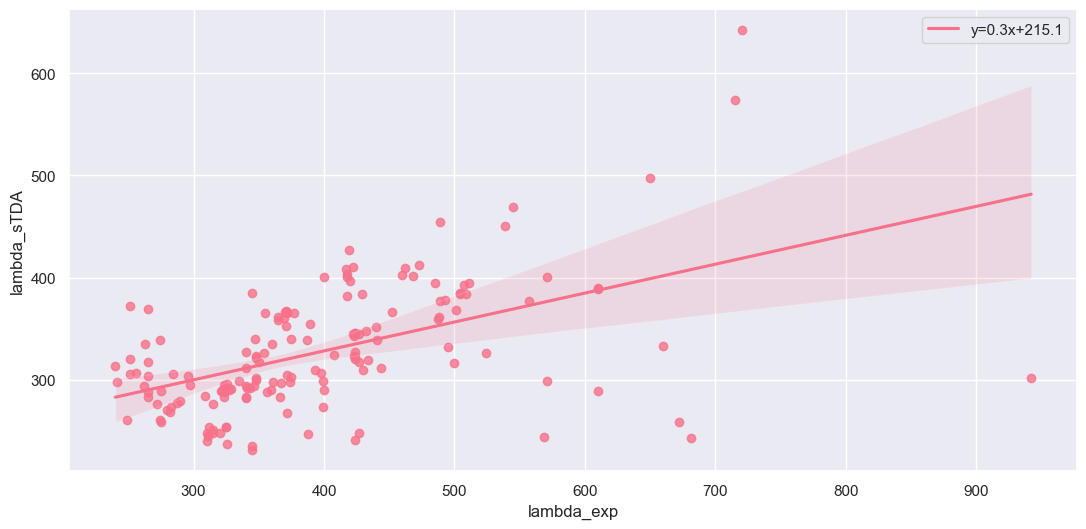

In [241]:
# regressão linear para (lambda_exp em chloroform, lambda_sTDA)

dados_chlo = dados.query("solvent == 'chloroform'")

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_chlo['lambda_exp'],dados_chlo['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_chlo, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_chlo['lambda_exp'],dados_chlo['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.2583229496503126
Intercept of the regression line: 234.88758989244542
Coefficient of determination: 0.21875834557864443


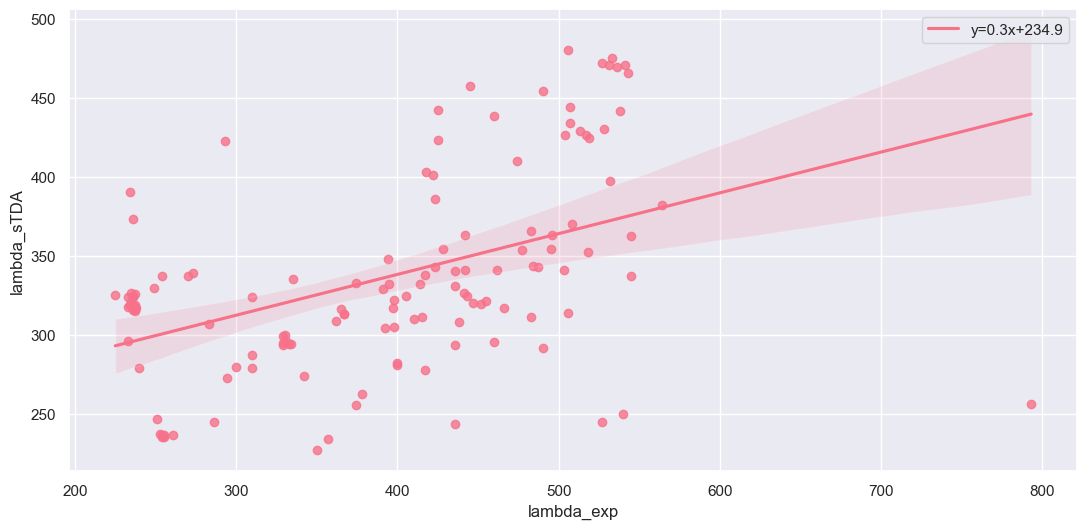

In [242]:
# regressão linear para (lambda_exp em methanol, lambda_sTDA)

dados_metoh = dados.query("solvent == 'methanol'")

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_metoh['lambda_exp'],dados_metoh['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_metoh, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_metoh['lambda_exp'],dados_metoh['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.2571249725676501
Intercept of the regression line: 221.48680385280565
Coefficient of determination: 0.23740264805504913


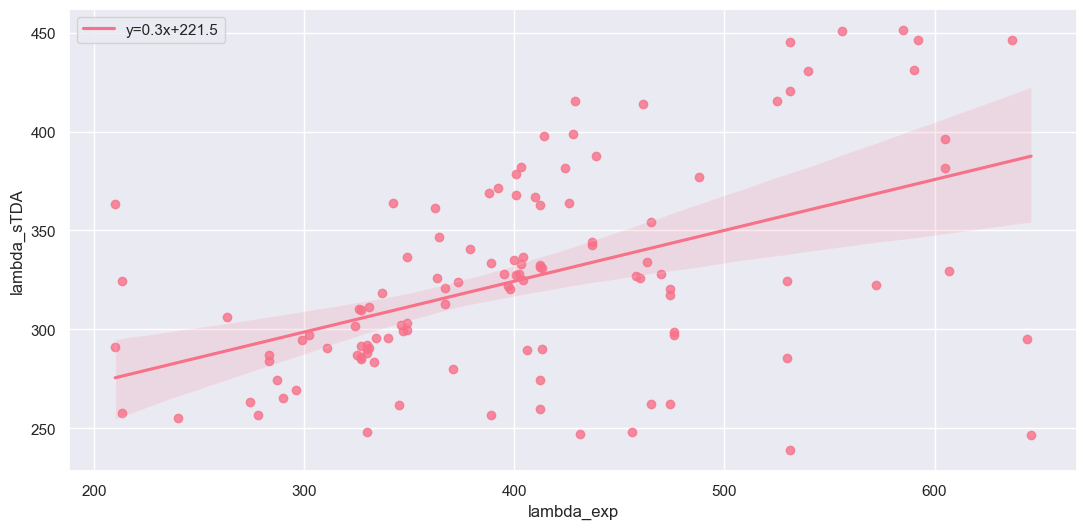

In [243]:
# regressão linear para (lambda_exp em thf, lambda_sTDA)

dados_thf = dados.query("solvent == 'thf'")

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_thf['lambda_exp'],dados_thf['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_thf, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_thf['lambda_exp'],dados_thf['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

# Correlação entre gap HL e lambdas

Slope of the regression line: 2.5571403451322
Intercept of the regression line: -80.57849169682055
Coefficient of determination: 0.6771564224384051


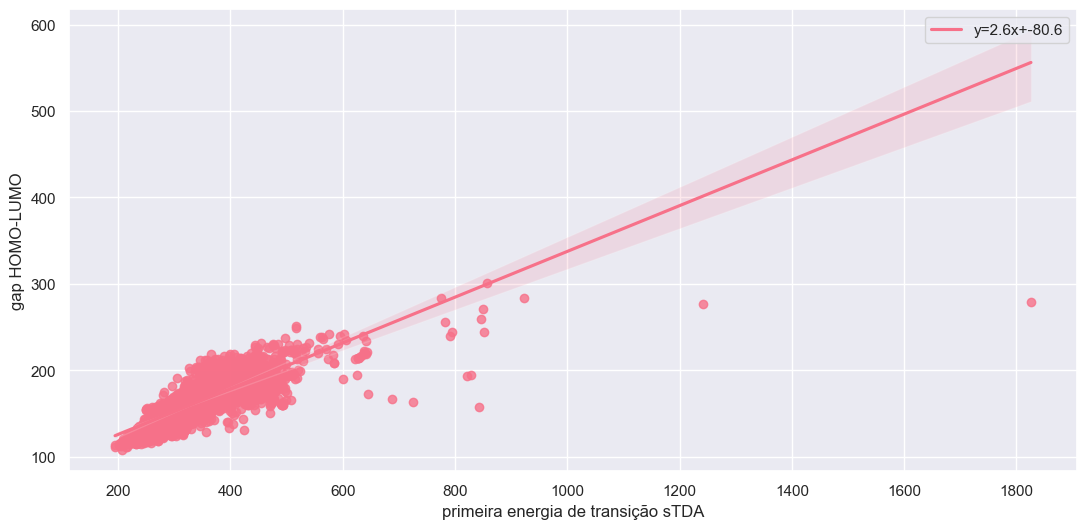

In [47]:
# obtendo regressão linear para (gap_HL, lambda_sTDA)

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['gap_HL'],dados['lambda_sTDA'])
ax = sns.regplot(x='lambda_sTDA', y='gap_HL', data = dados, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='primeira energia de transição sTDA', ylabel='gap HOMO-LUMO')
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['gap_HL'],dados['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 1.0449315553914764
Intercept of the regression line: 302.880884104189
Coefficient of determination: 0.001412929487849415


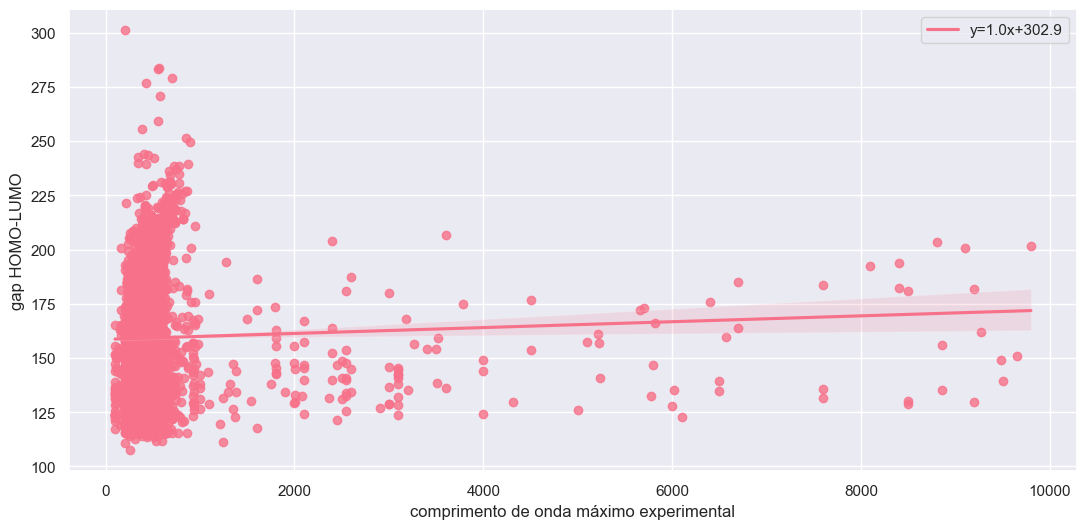

In [49]:
# obtendo regressão linear para (gap_HL, lambda_exp)

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['gap_HL'],dados['lambda_exp'])
ax = sns.regplot(x='lambda_exp', y='gap_HL', data = dados, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='comprimento de onda máximo experimental', ylabel='gap HOMO-LUMO')
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['gap_HL'],dados['lambda_exp'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 1.0449315553914764
Intercept of the regression line: 302.880884104189
Coefficient of determination: 0.001412929487849415


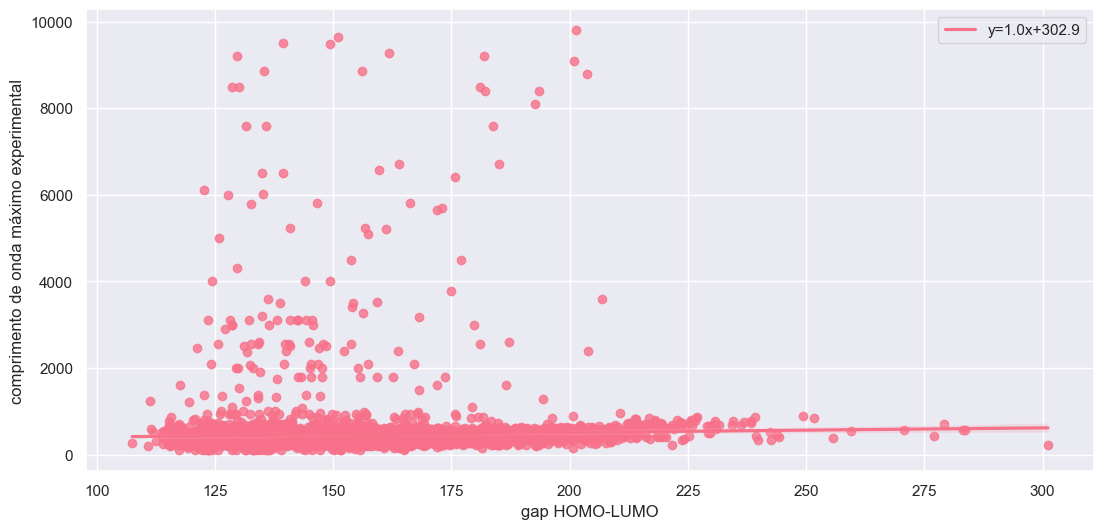

In [16]:
# obtendo regressão linear para (gap_HL, lambda_exp)

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['gap_HL'],dados['lambda_exp'])
ax = sns.regplot(x='gap_HL', y='lambda_exp', data = dados, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='gap HOMO-LUMO', ylabel='comprimento de onda máximo experimental')
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['gap_HL'],dados['lambda_exp'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

TypeError: can only concatenate str (not "int") to str

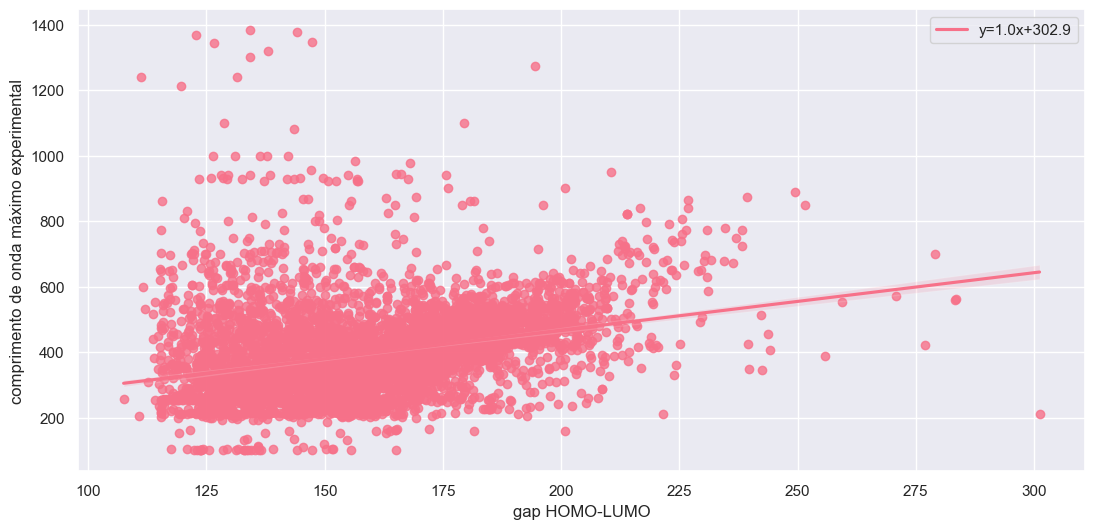

In [21]:
# obtendo regressão linear para (gap_HL, lambda_exp)

ax = sns.regplot(x='gap_HL', y='lambda_exp', data = dados[dados['lambda_exp'] < 1500], line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='gap HOMO-LUMO', ylabel='comprimento de onda máximo experimental')
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['gap_HL'], dados[dados['lambda_exp'] < 1500])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

# Distribuição do erro dos lambdas vs. peso molecular

Slope of the regression line: 0.3098932885665237
Intercept of the regression line: -255.00479915090824
Coefficient of determination: 0.004131493657004561


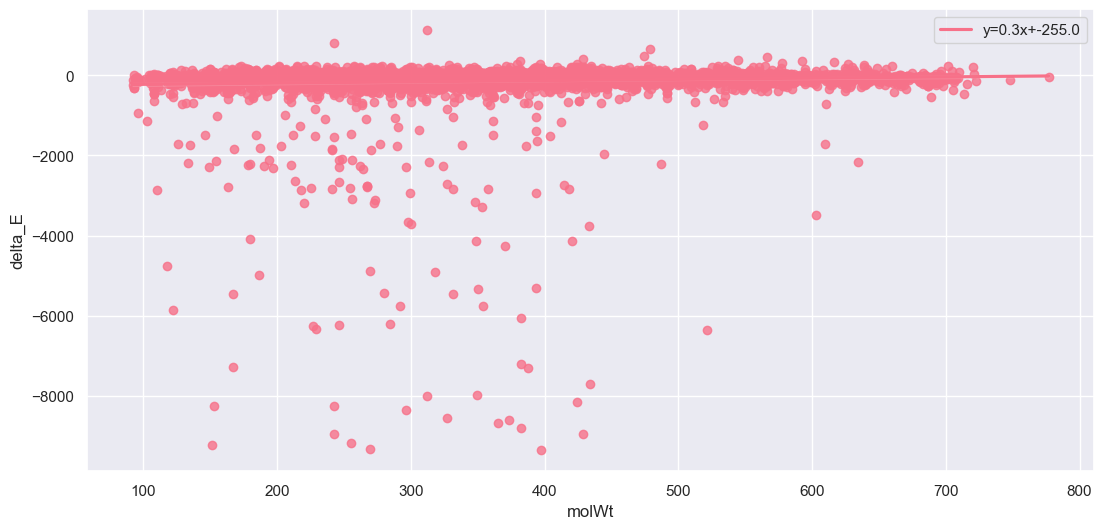

In [246]:
# obtendo regressão linear para (molWt, lambda_sTDA)

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['molWt'],dados['delta_E'])
ax = sns.regplot(x='molWt', y='delta_E', data = dados, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados['molWt'],dados['delta_E'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.6304902143297944
Intercept of the regression line: -321.12155124206646
Coefficient of determination: 0.0011213376243836856


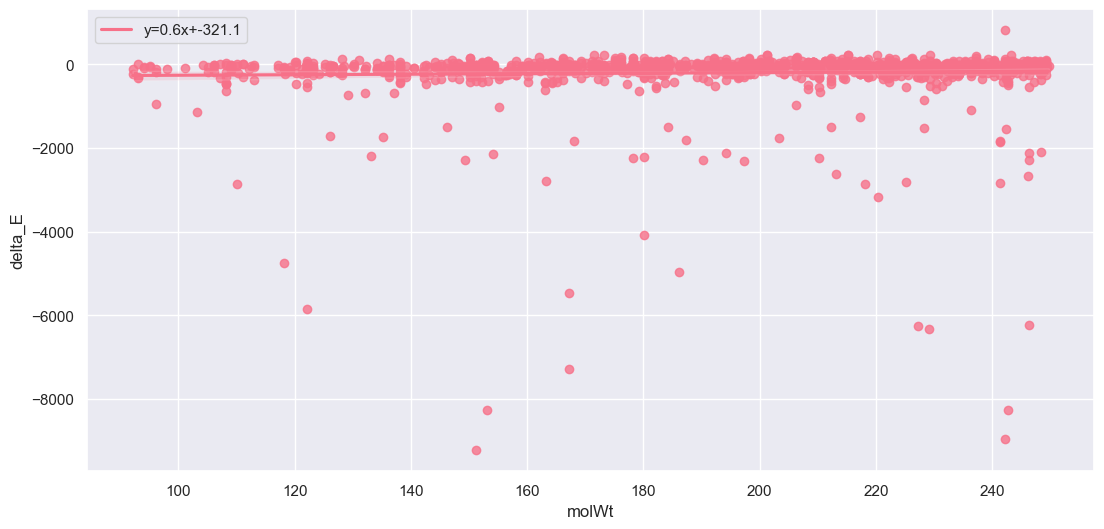

In [247]:
# obtendo regressão linear para (molWt, lambda_sTDA) em molécula com peso molecular < 250

small_molWt = dados.query("molWt < 250")
slope, intercept, r_value, p_value, std_err = stats.linregress(small_molWt['molWt'],small_molWt['delta_E'])
ax = sns.regplot(x='molWt', y='delta_E', data = small_molWt, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(small_molWt['molWt'],small_molWt['delta_E'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.3568043642709816
Intercept of the regression line: -269.4151406381507
Coefficient of determination: 0.0018953192587585243


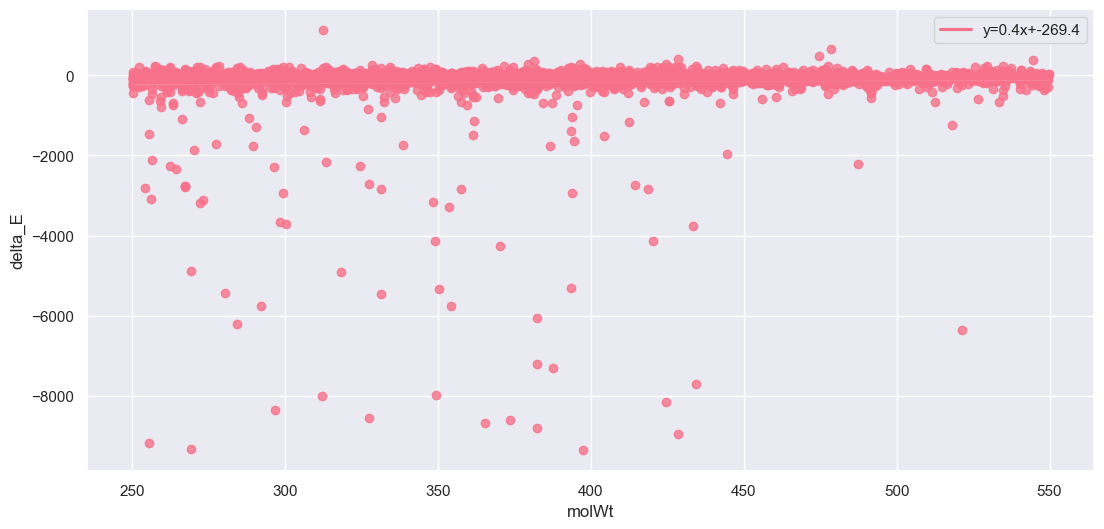

In [248]:
# obtendo regressão linear para (molWt, lambda_sTDA) em moléculas entre 250 < peso molecular < 550

interm_molWt = dados.query("molWt > 250 & molWt < 550")
slope, intercept, r_value, p_value, std_err = stats.linregress(interm_molWt['molWt'],interm_molWt['delta_E'])
ax = sns.regplot(x='molWt', y='delta_E', data = interm_molWt, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(interm_molWt['molWt'],interm_molWt['delta_E'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: -0.18581769690377453
Intercept of the regression line: 36.46867997444241
Coefficient of determination: 0.0017173437142598777


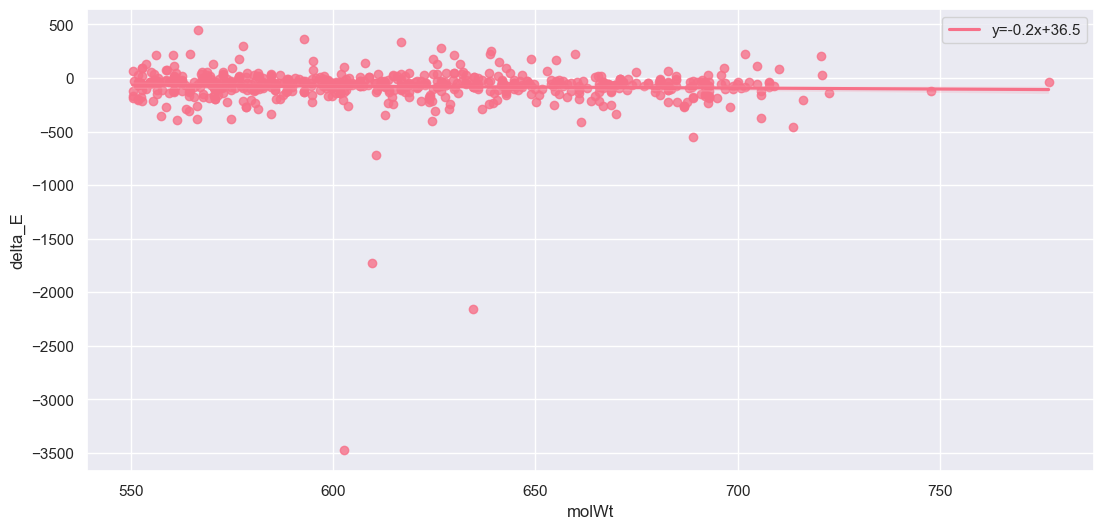

In [249]:
# obtendo regressão linear para (molWt, lambda_sTDA) em molécula com peso molecular > 550

big_molWt = dados.query("molWt > 550")
slope, intercept, r_value, p_value, std_err = stats.linregress(big_molWt['molWt'],big_molWt['delta_E'])
ax = sns.regplot(x='molWt', y='delta_E', data = big_molWt, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(big_molWt['molWt'],big_molWt['delta_E'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

# Distribuição do erro dos lambdas vs. solvente

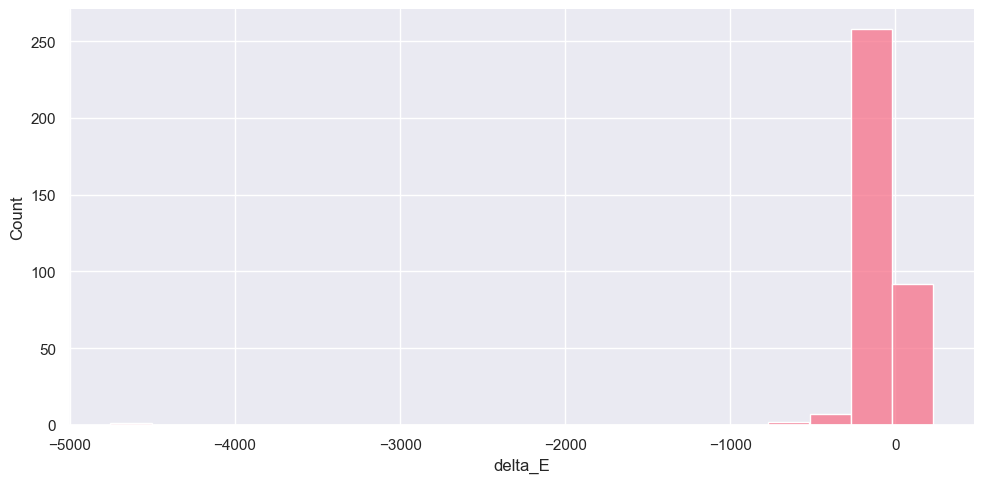

In [250]:
# distribuição do erro dos lambdas para dichloromethane
sns.displot(dados_dichlo, x='delta_E', bins=20, height=5, aspect=2)

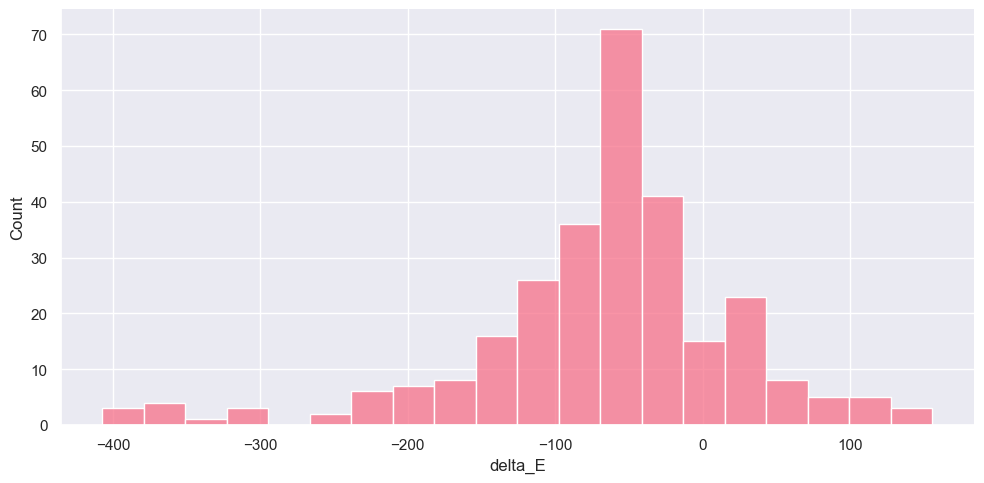

In [251]:
# distribuição do erro dos lambdas para DMSO
sns.displot(dados_dmso, x='delta_E', bins=20, height=5, aspect=2)

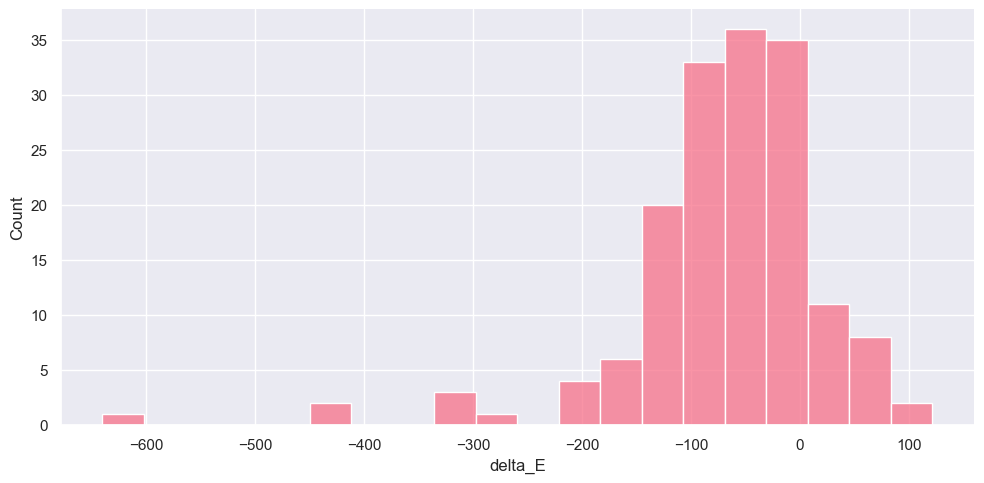

In [252]:
# distribuição do erro dos lambdas para chloroform
sns.displot(dados_chlo, x='delta_E', bins=20, height=5, aspect=2)

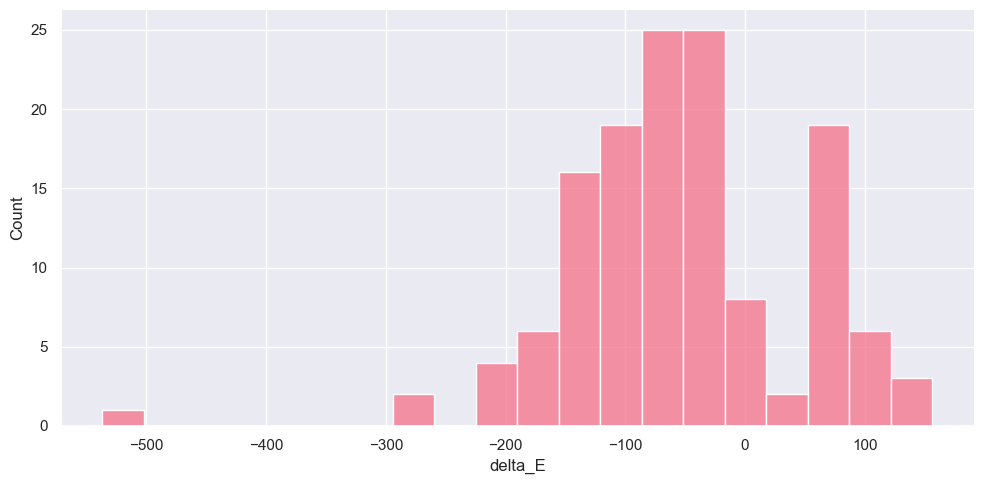

In [253]:
# distribuição do erro dos lambdas para methanol
sns.displot(dados_metoh, x='delta_E', bins=20, height=5, aspect=2)

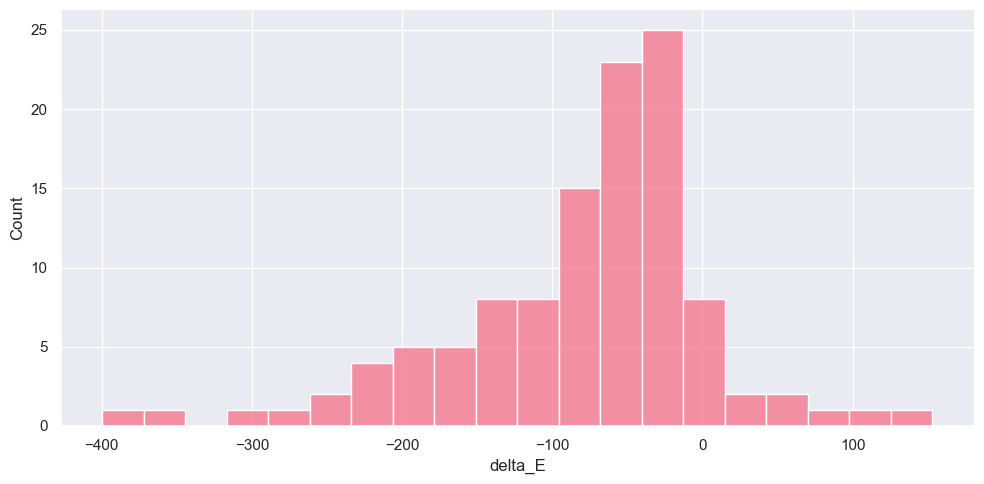

In [254]:
# distribuição do erro dos lambdas para thf
sns.displot(dados_thf, x='delta_E', bins=20, height=5, aspect=2)

# Distribuição dos dados em cada solvente

## DMSO

Primeiro quartil = 369.5
Mediana = 340.39
Terceiro quartil = 488.0


<Axes: xlabel='lambda_exp'>

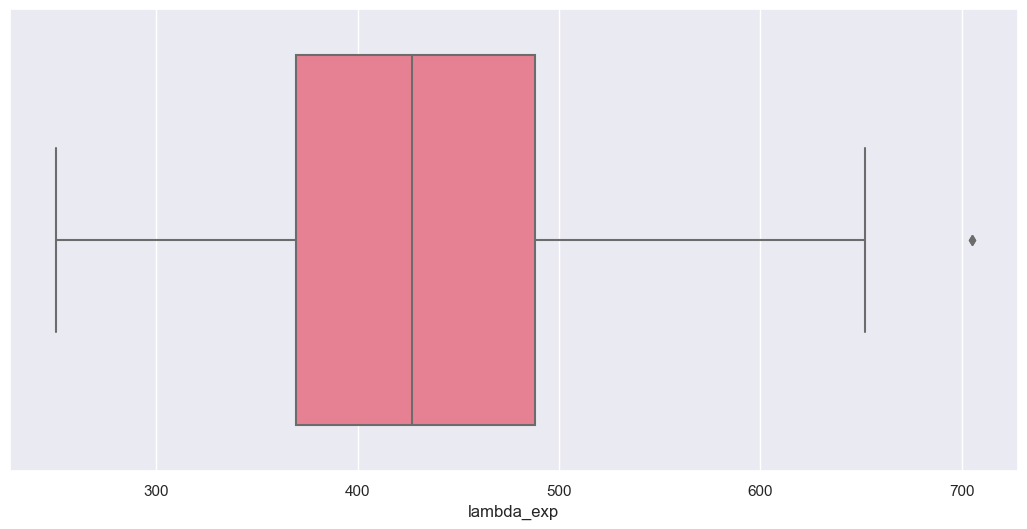

In [255]:
print('Primeiro quartil = %s' %(dados_dmso.describe().iloc[4,0]))
print('Mediana = %s' %(dados_dmso.describe().iloc[5,4]))
print('Terceiro quartil = %s' %(dados_dmso.describe().iloc[6,0]))
sns.boxplot(x='lambda_exp', data=dados_dmso)

In [256]:
[y for stat in boxplot_stats(dados_dmso['lambda_exp']) for y in stat['fliers']]

[705, 705]

## Dichloromethane

Primeiro quartil = 342.0
Mediana = 338.95
Terceiro quartil = 470.75


<Axes: xlabel='lambda_exp'>

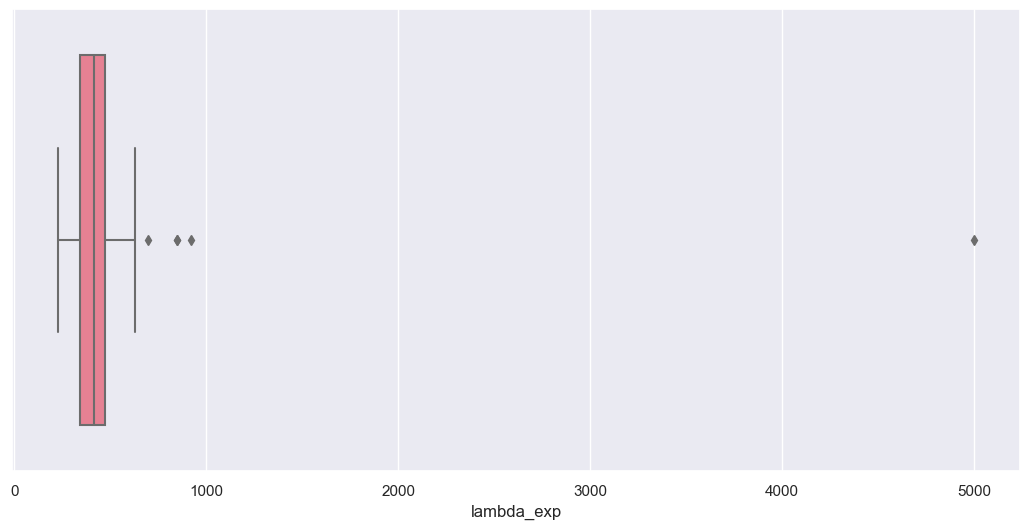

In [257]:
print('Primeiro quartil = %s' %(dados_dichlo.describe().iloc[4,0]))
print('Mediana = %s' %(dados_dichlo.describe().iloc[5,1]))
print('Terceiro quartil = %s' %(dados_dichlo.describe().iloc[6,0]))
sns.boxplot(x='lambda_exp', data=dados_dichlo)

In [258]:
[y for stat in boxplot_stats(dados_dichlo['lambda_exp']) for y in stat['fliers']]

[848, 848, 5000, 923, 696]

## Methanol

Primeiro quartil = 272.25
Mediana = 322.9
Terceiro quartil = 478.5


<Axes: xlabel='lambda_exp'>

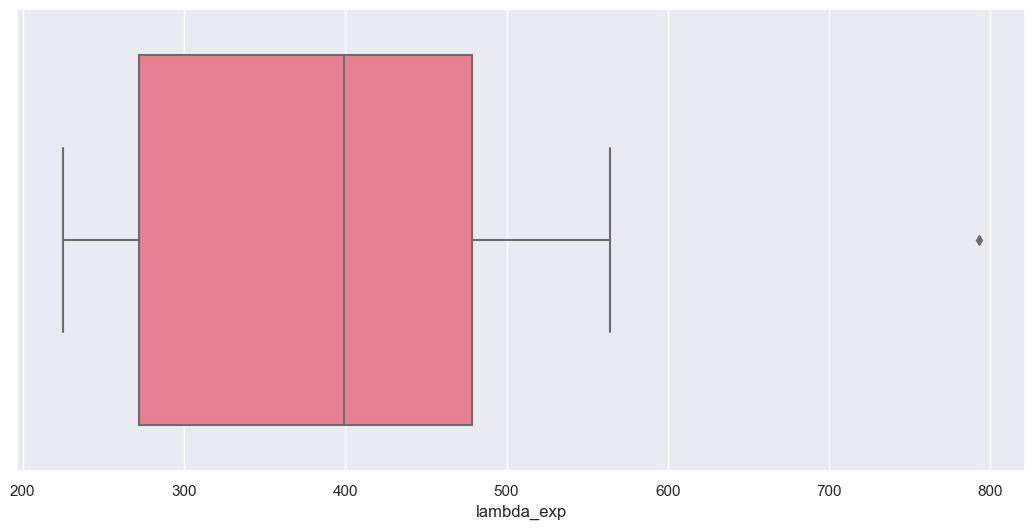

In [259]:
print('Primeiro quartil = %s' %(dados_metoh.describe().iloc[4,0]))
print('Mediana = %s' %(dados_metoh.describe().iloc[5,1]))
print('Terceiro quartil = %s' %(dados_metoh.describe().iloc[6,0]))
sns.boxplot(x='lambda_exp', data=dados_metoh)

In [260]:
[y for stat in boxplot_stats(dados_metoh['lambda_exp']) for y in stat['fliers']]

[793]

## Chloroform

Primeiro quartil = 323.25
Mediana = 316.8
Terceiro quartil = 431.5


<Axes: xlabel='lambda_exp'>

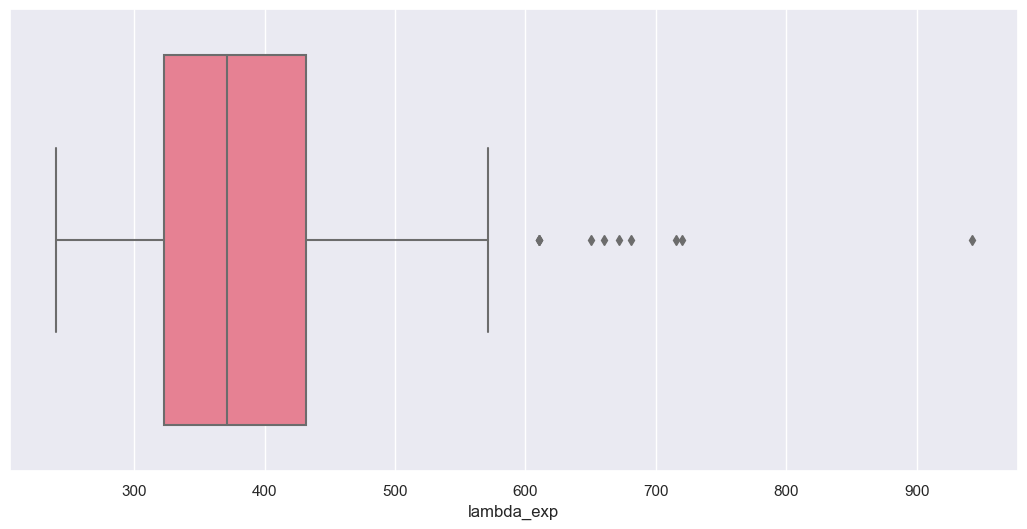

In [261]:
print('Primeiro quartil = %s' %(dados_chlo.describe().iloc[4,0]))
print('Mediana = %s' %(dados_chlo.describe().iloc[5,1]))
print('Terceiro quartil = %s' %(dados_chlo.describe().iloc[6,0]))
sns.boxplot(x='lambda_exp', data=dados_chlo)

In [262]:
[y for stat in boxplot_stats(dados_chlo['lambda_exp']) for y in stat['fliers']]

[610, 610, 610, 720, 660, 942, 650, 681, 672, 715]

In [263]:
# obtendo as entradas em que lambda_exp > 600
dados_chlo.query("lambda_exp >= 610")

,SMILES_exp,SMILES_teorico,lambda_exp,lambda_unit,extinction,extinction_unit,solvent,lambda_sTDA,f_sTDA,gap_HL,molWt,delta_E
1470,CCCCC(Cn1c2cc(sc2c2c1cc(s2)C=C(C(=O)O)C#N)c1cc...,C(Cn1c2cc(sc2c2c1cc(s2)C=C(C(=O)O)C#N)c1ccc(cc...,610,NaN,NaN,NaN,chloroform,389.9,2.258391,201.60,573.74,-220.1
2210,CCCCCCOc1ccc(cc1)n1c2cc(sc2c2c1cc(s2)C=C(C(=O)...,COc1ccc(cc1)n1c2cc(sc2c2c1cc(s2)C=C(C(=O)O)C#N...,610,NaN,NaN,NaN,chloroform,389.3,2.215124,201.71,623.76,-220.7
2211,CCCCCCOc1ccc(cc1)n1c2cc(sc2c2c1cc(s2)C=C(C(=O)...,Oc1ccc(cc1)c1cc(=O)c2c(o1)cc(c(c2O)O)O,610,NaN,NaN,NaN,chloroform,289.4,0.141931,152.97,286.24,-320.6
3277,CCCCCCCCCCCCCCCCOc1ccc(cc1)C1=C2C=CC(=N2)C(=c2...,COc1ccc(cc1)C1=C2C=CC(=N2)C(=c2ccc(=C(C3=NC(=C...,720,nm,NaN,NaN,chloroform,642.1,0.009384,219.34,692.78,-77.9
3409,c1ccc2Cc(c1)cccc2,c1ccc2Cc(c1)cccc2,660,nm,NaN,NaN,chloroform,332.7,0.012490,147.24,142.20,-327.3
3723,CCCCCCCCCCCCc1ccc(s1)c1ccc(s1)Br,Cc1ccc(s1)c1ccc(s1)Br,942,NaN,NaN,NaN,chloroform,301.9,0.651356,154.85,259.19,-640.1
4101,CCN1c2ccc3c(c2C(C1=CC1=C([O-])C(=CC2=[N+](CC)c...,CCN1c2ccc3c(c2C(C1=CC1=C([O-])C(=CC2=[N+](CC)c...,650,NaN,NaN,NaN,chloroform,497.3,2.034951,223.49,502.66,-152.7
4125,[Gd+3],COc1cccc(c1C(=O)N[C@@H]1C(=O)N2[C@@H]1SC([C@@H...,681,nm,5.53,log,chloroform,243.1,0.037436,124.56,380.42,-437.9
4434,O=C(C(NC(=O)c1ccccc1)Cc1ccc(cc1)O)Nc1ccc(cc1)C...,O=C(C(NC(=O)c1ccccc1)Cc1ccc(cc1)O)Nc1ccc(cc1)C...,672,nm,NaN,NaN,chloroform,259.2,0.423212,138.74,404.42,-412.8
5616,C1CC2=Cc3ccc([nH]3)C=c3[nH]c(=Cc4[nH]c(C=C1N2)...,C1CC2=Cc3ccc([nH]3)C=c3[nH]c(=Cc4[nH]c(C=C1N2)...,715,nm,NaN,NaN,chloroform,573.9,0.117682,213.52,314.39,-141.1


In [264]:
# removendo outliers
dados_chlo = dados_chlo[dados_chlo['lambda_exp'] < 610]

Primeiro quartil = 322.75
Mediana = 314.9
Terceiro quartil = 424.0


<Axes: xlabel='lambda_exp'>

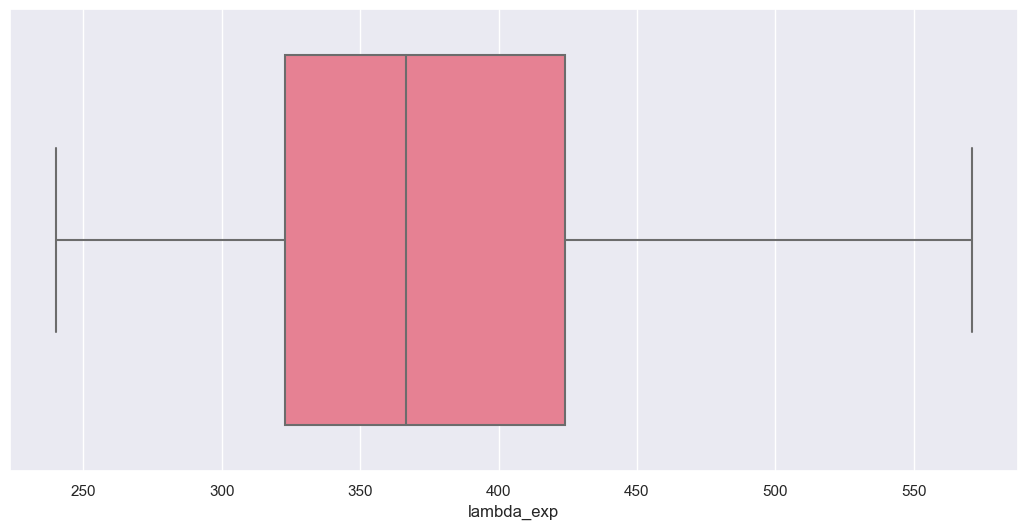

In [265]:
print('Primeiro quartil = %s' %(dados_chlo.describe().iloc[4,0]))
print('Mediana = %s' %(dados_chlo.describe().iloc[5,1]))
print('Terceiro quartil = %s' %(dados_chlo.describe().iloc[6,0]))
sns.boxplot(x='lambda_exp', data=dados_chlo)

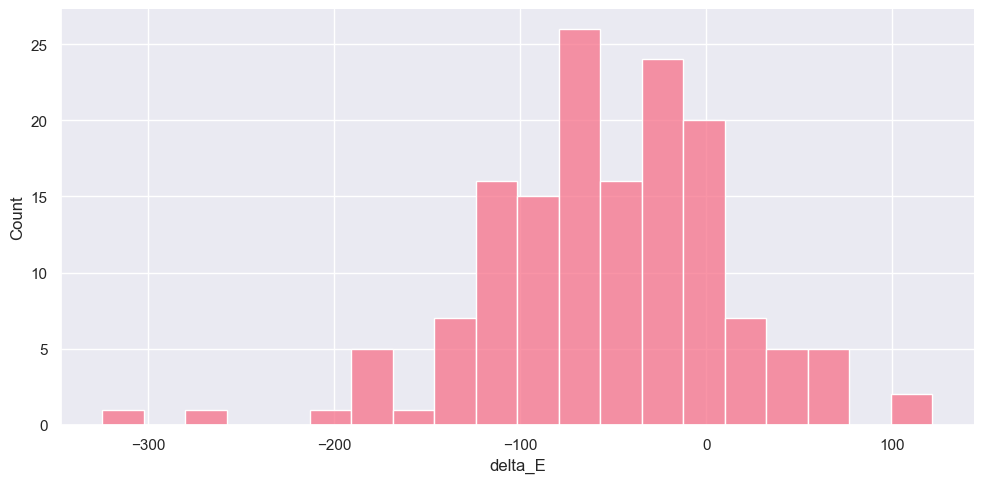

In [266]:
# distribuição do erro dos lambdas para chloroform
sns.displot(dados_chlo, x='delta_E', bins=20, height=5, aspect=2)

Slope of the regression line: 0.36697134813329696
Intercept of the regression line: 184.61763251201901
Coefficient of determination: 0.3289770282152537


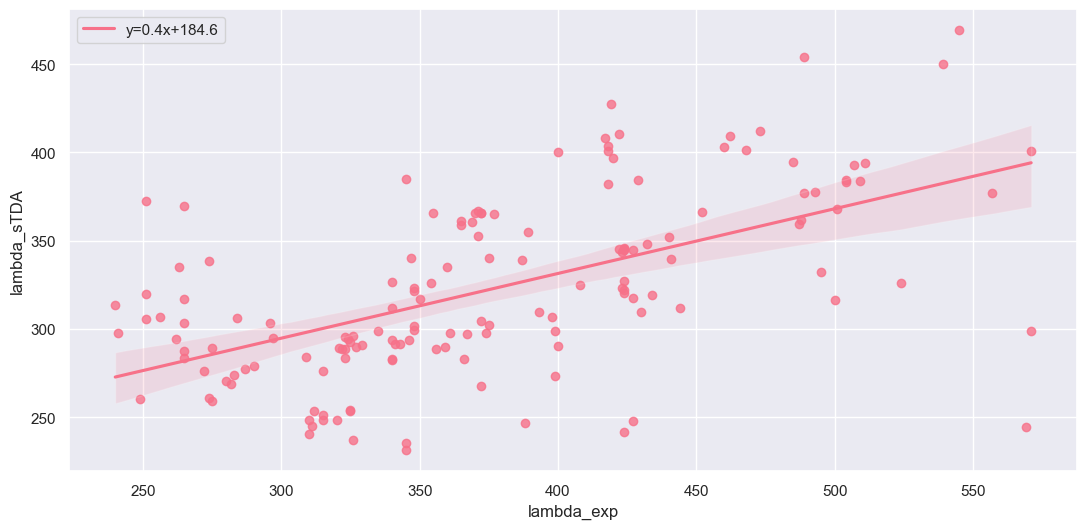

In [267]:
# regressão linear para (lambda_exp em methanol, lambda_sTDA)

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_chlo['lambda_exp'],dados_chlo['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_chlo, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_chlo['lambda_exp'],dados_chlo['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

## THF

Primeiro quartil = 331.5
Mediana = 321.4
Terceiro quartil = 460.75


<Axes: xlabel='lambda_exp'>

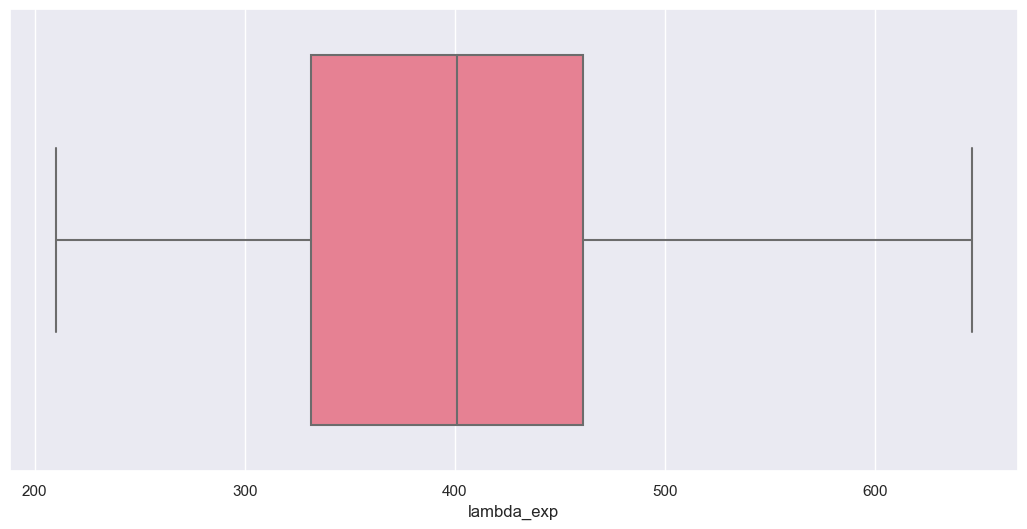

In [268]:
print('Primeiro quartil = %s' %(dados_thf.describe().iloc[4,0]))
print('Mediana = %s' %(dados_thf.describe().iloc[5,1]))
print('Terceiro quartil = %s' %(dados_thf.describe().iloc[6,0]))
sns.boxplot(x='lambda_exp', data=dados_thf) 